In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

from utils import summarize_df, plot_signals_p_value, plot_signals_auc, plot_signals_gini, plot_conf_int, plot_correction
from utils import plot_AUC,plot_signals_youden, plot_signals_roc01, summarize_thresholds, summarize_thresholds2, summarize_sen_spe
from statsmodels.stats.multitest import multipletests

In [2]:
infections = pd.read_csv('epi_data_age_gender.csv')
inf_idxs = list(infections[(infections.Group != 'HC') & (infections.Infection == 'Yes')].ID)
uninf_idxs = list(infections[(infections.Group != 'HC') & (infections.Infection != 'Yes')].ID)
data = pd.read_excel('S1File.xlsx', sheet_name = 'CFS_JPT_Seroarray')
data = data.iloc[1254:1270]
data = data[list(data.columns[:8])+inf_idxs+uninf_idxs]

# Signals

In [3]:
smr, all_lower_bounds, all_p_values, auc, gini, x_plot, y_plot, youden, roc01 = summarize_df(data, 8, 62)

**Chi-squared**

In [4]:
smr_p_value = smr[['name', 'min_p_value', 'test_lower_bound', 'test_upper_bound']]
smr_p_value.columns = ['ID', 'minimum p-value', 'lower bound', 'upper bound']
smr_p_value.iloc[:, 2:] = np.round(smr_p_value.iloc[:, 2:], 3)
smr_p_value

ID  minimum p-value  lower bound  upper bound
0               EBNA1_0415 (AG876)         0.079924      980.000      997.667
1               EBNA1_0415 (B95-8)         0.227018     1229.667     1230.000
2               EBNA1_0419 (AG876)         0.081105     2967.333     3046.000
3          EBNA1_0419 (B95-8, GD1)         0.109330     1898.000     2248.333
4               EBNA1_0423 (AG876)         0.041255     1080.500     1106.333
5          EBNA1_0423 (B95-8, GD1)         0.012535     1197.000     1197.333
6                 EBNA1_0427 (GD1)         0.229515     1291.000     1311.000
7        EBNA1_0430 (AG876, B95-8)         0.063476     1962.333     2028.667
8                 EBNA1_0431 (GD1)         0.568534     1060.667     1068.000
9        EBNA1_0434 (AG876, B95-8)         0.311348      930.333      930.333
10                EBNA1_0435 (GD1)         0.089793     8173.000    10797.333
11  EBNA1_0440 (AG876, B95-8, GD1)         0.175130      908.000      924.333
12  EBNA1_0444 (AG876, B95-8, GD1)         0.205208     1365.333     1409.667
13  EBNA1_0448 (AG876, B95-8, GD1)         0.305548      992.667      993.667
14              EBNA1_0452 (AG876)         0.074983     1798.667     1811.667
15         EBNA1_0452 (B95-8, GD1)         0.061384     1910.000     1912.000

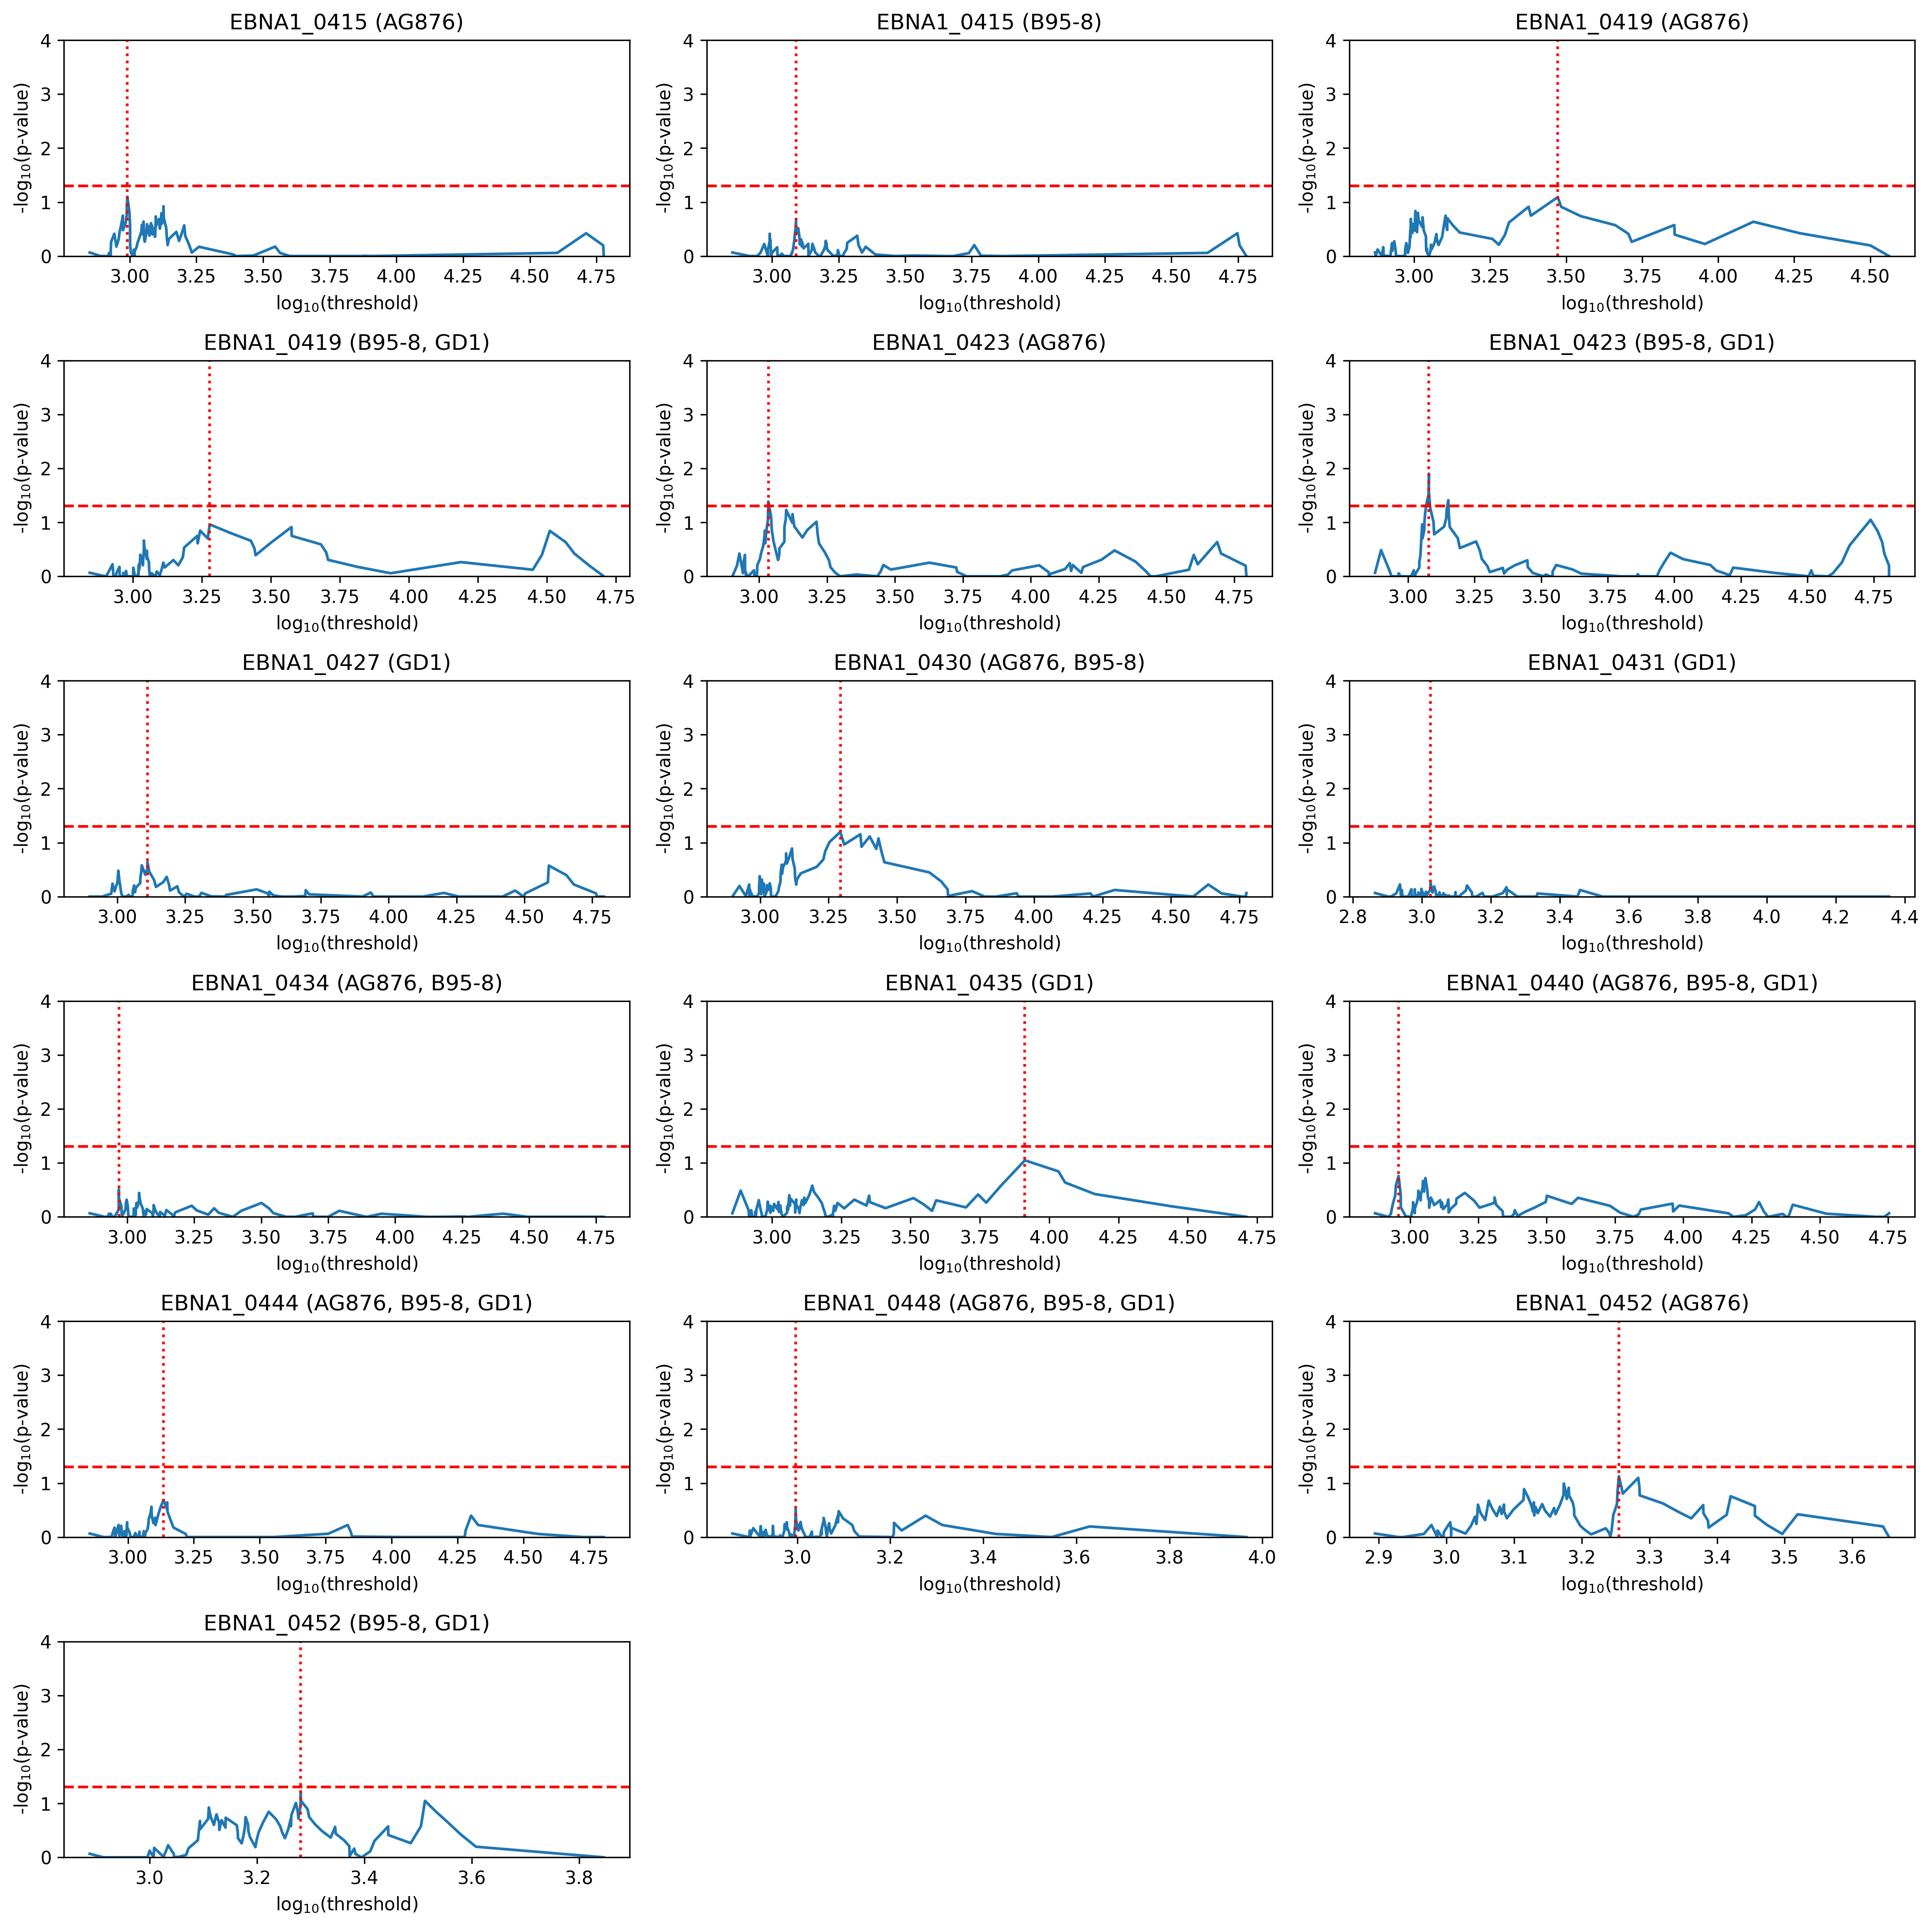

In [5]:
plot_signals_p_value(smr, all_lower_bounds, all_p_values)

**ROC with AUC**

In [6]:
smr_roc = smr[['name', 'AUC_total', 'min_roc01', 'max_youden', 'min_dist']]
smr_roc.columns = ['ID', 'AUC', 'ROC01', "Youden's J-statistic", '|Sen-Spe|']
smr_roc.iloc[:, 1:] = np.round(smr_roc.iloc[:, 1:], 3)
smr_roc

ID    AUC  ROC01  Youden's J-statistic  \
0               EBNA1_0415 (AG876)  0.580  0.605                 0.173   
1               EBNA1_0415 (B95-8)  0.532  0.639                 0.144   
2               EBNA1_0419 (AG876)  0.578  0.586                 0.174   
3          EBNA1_0419 (B95-8, GD1)  0.552  0.599                 0.165   
4               EBNA1_0423 (AG876)  0.565  0.560                 0.223   
5          EBNA1_0423 (B95-8, GD1)  0.545  0.565                 0.268   
6                 EBNA1_0427 (GD1)  0.505  0.623                 0.147   
7        EBNA1_0430 (AG876, B95-8)  0.541  0.581                 0.207   
8                 EBNA1_0431 (GD1)  0.507  0.675                 0.080   
9        EBNA1_0434 (AG876, B95-8)  0.533  0.625                 0.119   
10                EBNA1_0435 (GD1)  0.557  0.633                 0.136   
11  EBNA1_0440 (AG876, B95-8, GD1)  0.558  0.625                 0.152   
12  EBNA1_0444 (AG876, B95-8, GD1)  0.520  0.613                 0.151   
13  EBNA1_0448 (AG876, B95-8, GD1)  0.543  0.622                 0.130   
14              EBNA1_0452 (AG876)  0.593  0.576                 0.195   
15         EBNA1_0452 (B95-8, GD1)  0.586  0.591                 0.205   

    |Sen-Spe|  
0       0.173  
1       0.144  
2       0.174  
3       0.165  
4       0.223  
5       0.268  
6       0.147  
7       0.207  
8       0.080  
9       0.119  
10      0.136  
11      0.152  
12      0.151  
13      0.130  
14      0.195  
15      0.205

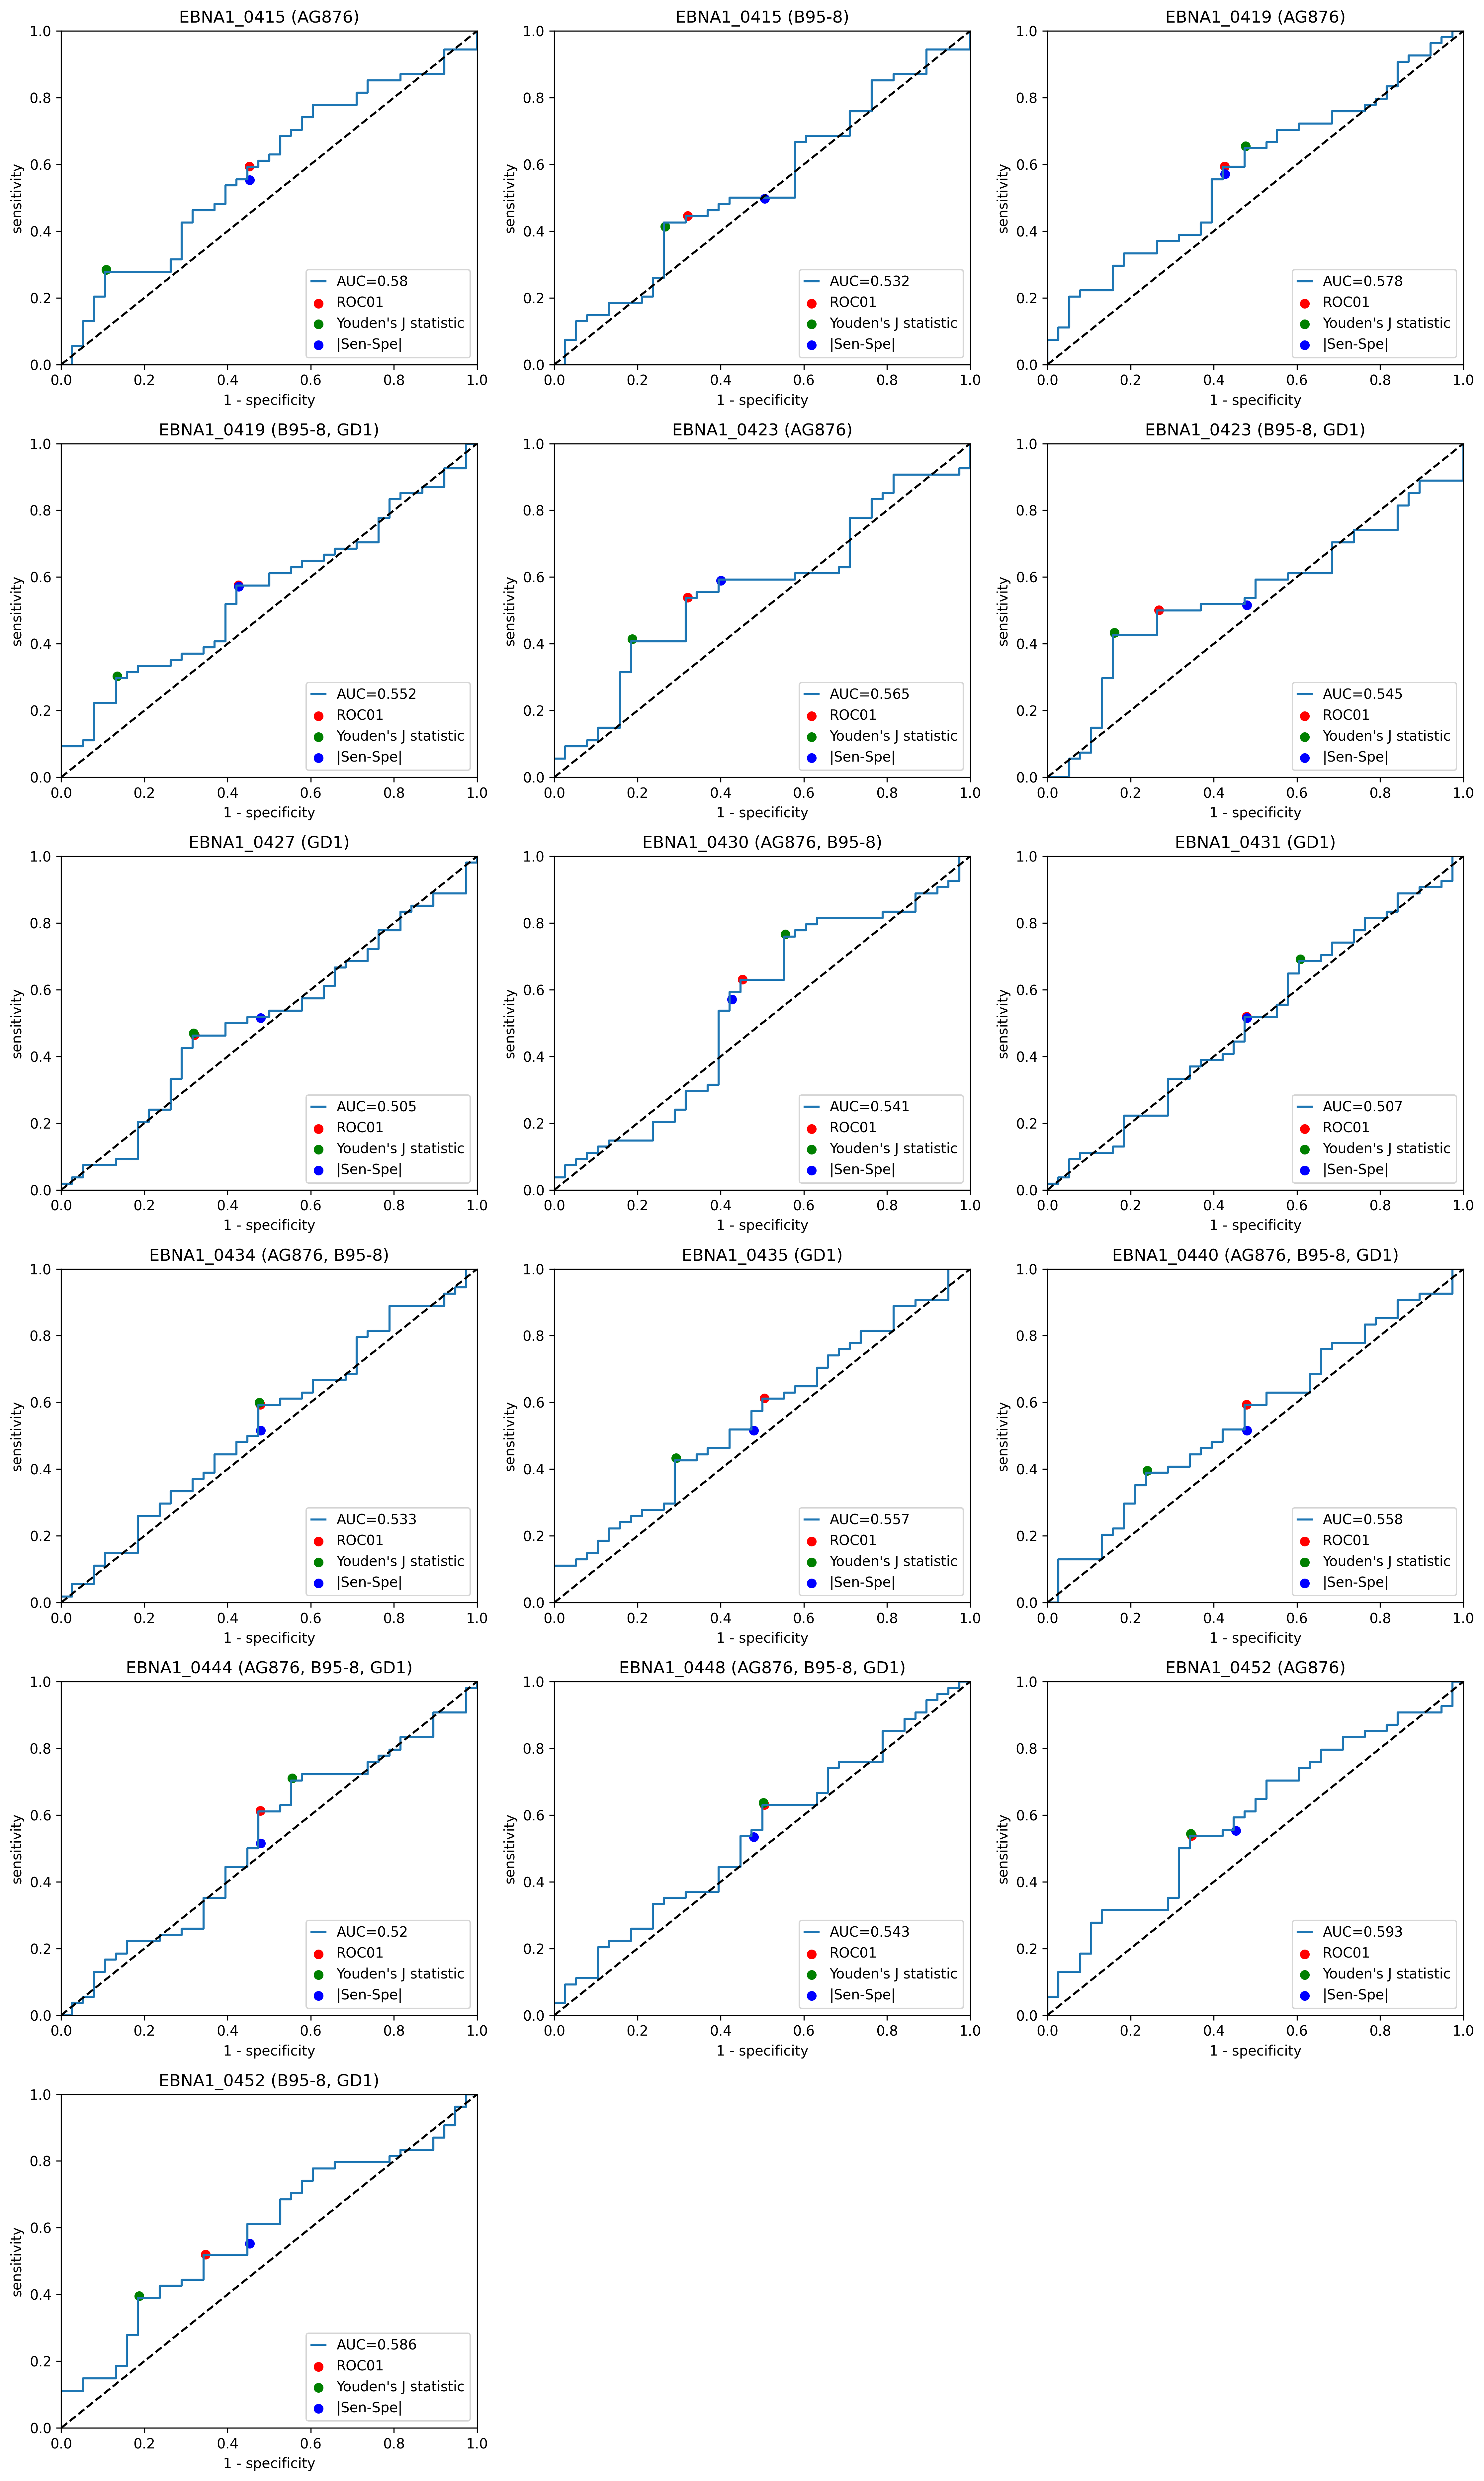

In [7]:
plot_AUC(smr, x_plot, y_plot)

**Youden**

In [8]:
smr_youden = smr[['name', 'max_youden', 'youden_lower_bound', 'youden_upper_bound']]
smr_youden.columns = ['ID', "Youden's J statistic", 'lower bound', 'upper bound']
smr_youden.iloc[:, 1:] = np.round(smr_youden.iloc[:, 1:], 3)
smr_youden

ID  Youden's J statistic  lower bound  \
0               EBNA1_0415 (AG876)                 0.173      980.000   
1               EBNA1_0415 (B95-8)                 0.144     1229.667   
2               EBNA1_0419 (AG876)                 0.174     1009.667   
3          EBNA1_0419 (B95-8, GD1)                 0.165     1898.000   
4               EBNA1_0423 (AG876)                 0.223     1080.500   
5          EBNA1_0423 (B95-8, GD1)                 0.268     1197.000   
6                 EBNA1_0427 (GD1)                 0.147     1291.000   
7        EBNA1_0430 (AG876, B95-8)                 0.207     1962.333   
8                 EBNA1_0431 (GD1)                 0.080     1060.667   
9        EBNA1_0434 (AG876, B95-8)                 0.119     1107.333   
10                EBNA1_0435 (GD1)                 0.136     1398.000   
11  EBNA1_0440 (AG876, B95-8, GD1)                 0.152     1138.667   
12  EBNA1_0444 (AG876, B95-8, GD1)                 0.151     1365.333   
13  EBNA1_0448 (AG876, B95-8, GD1)                 0.130      992.667   
14              EBNA1_0452 (AG876)                 0.195     1491.333   
15         EBNA1_0452 (B95-8, GD1)                 0.205     1910.000   

    upper bound  
0       997.667  
1      1230.000  
2      1012.000  
3      2248.333  
4      1106.333  
5      1197.333  
6      1311.000  
7      2028.667  
8      1068.000  
9      1113.000  
10     1418.667  
11     1155.000  
12     1409.667  
13      993.667  
14     1501.333  
15     1912.000

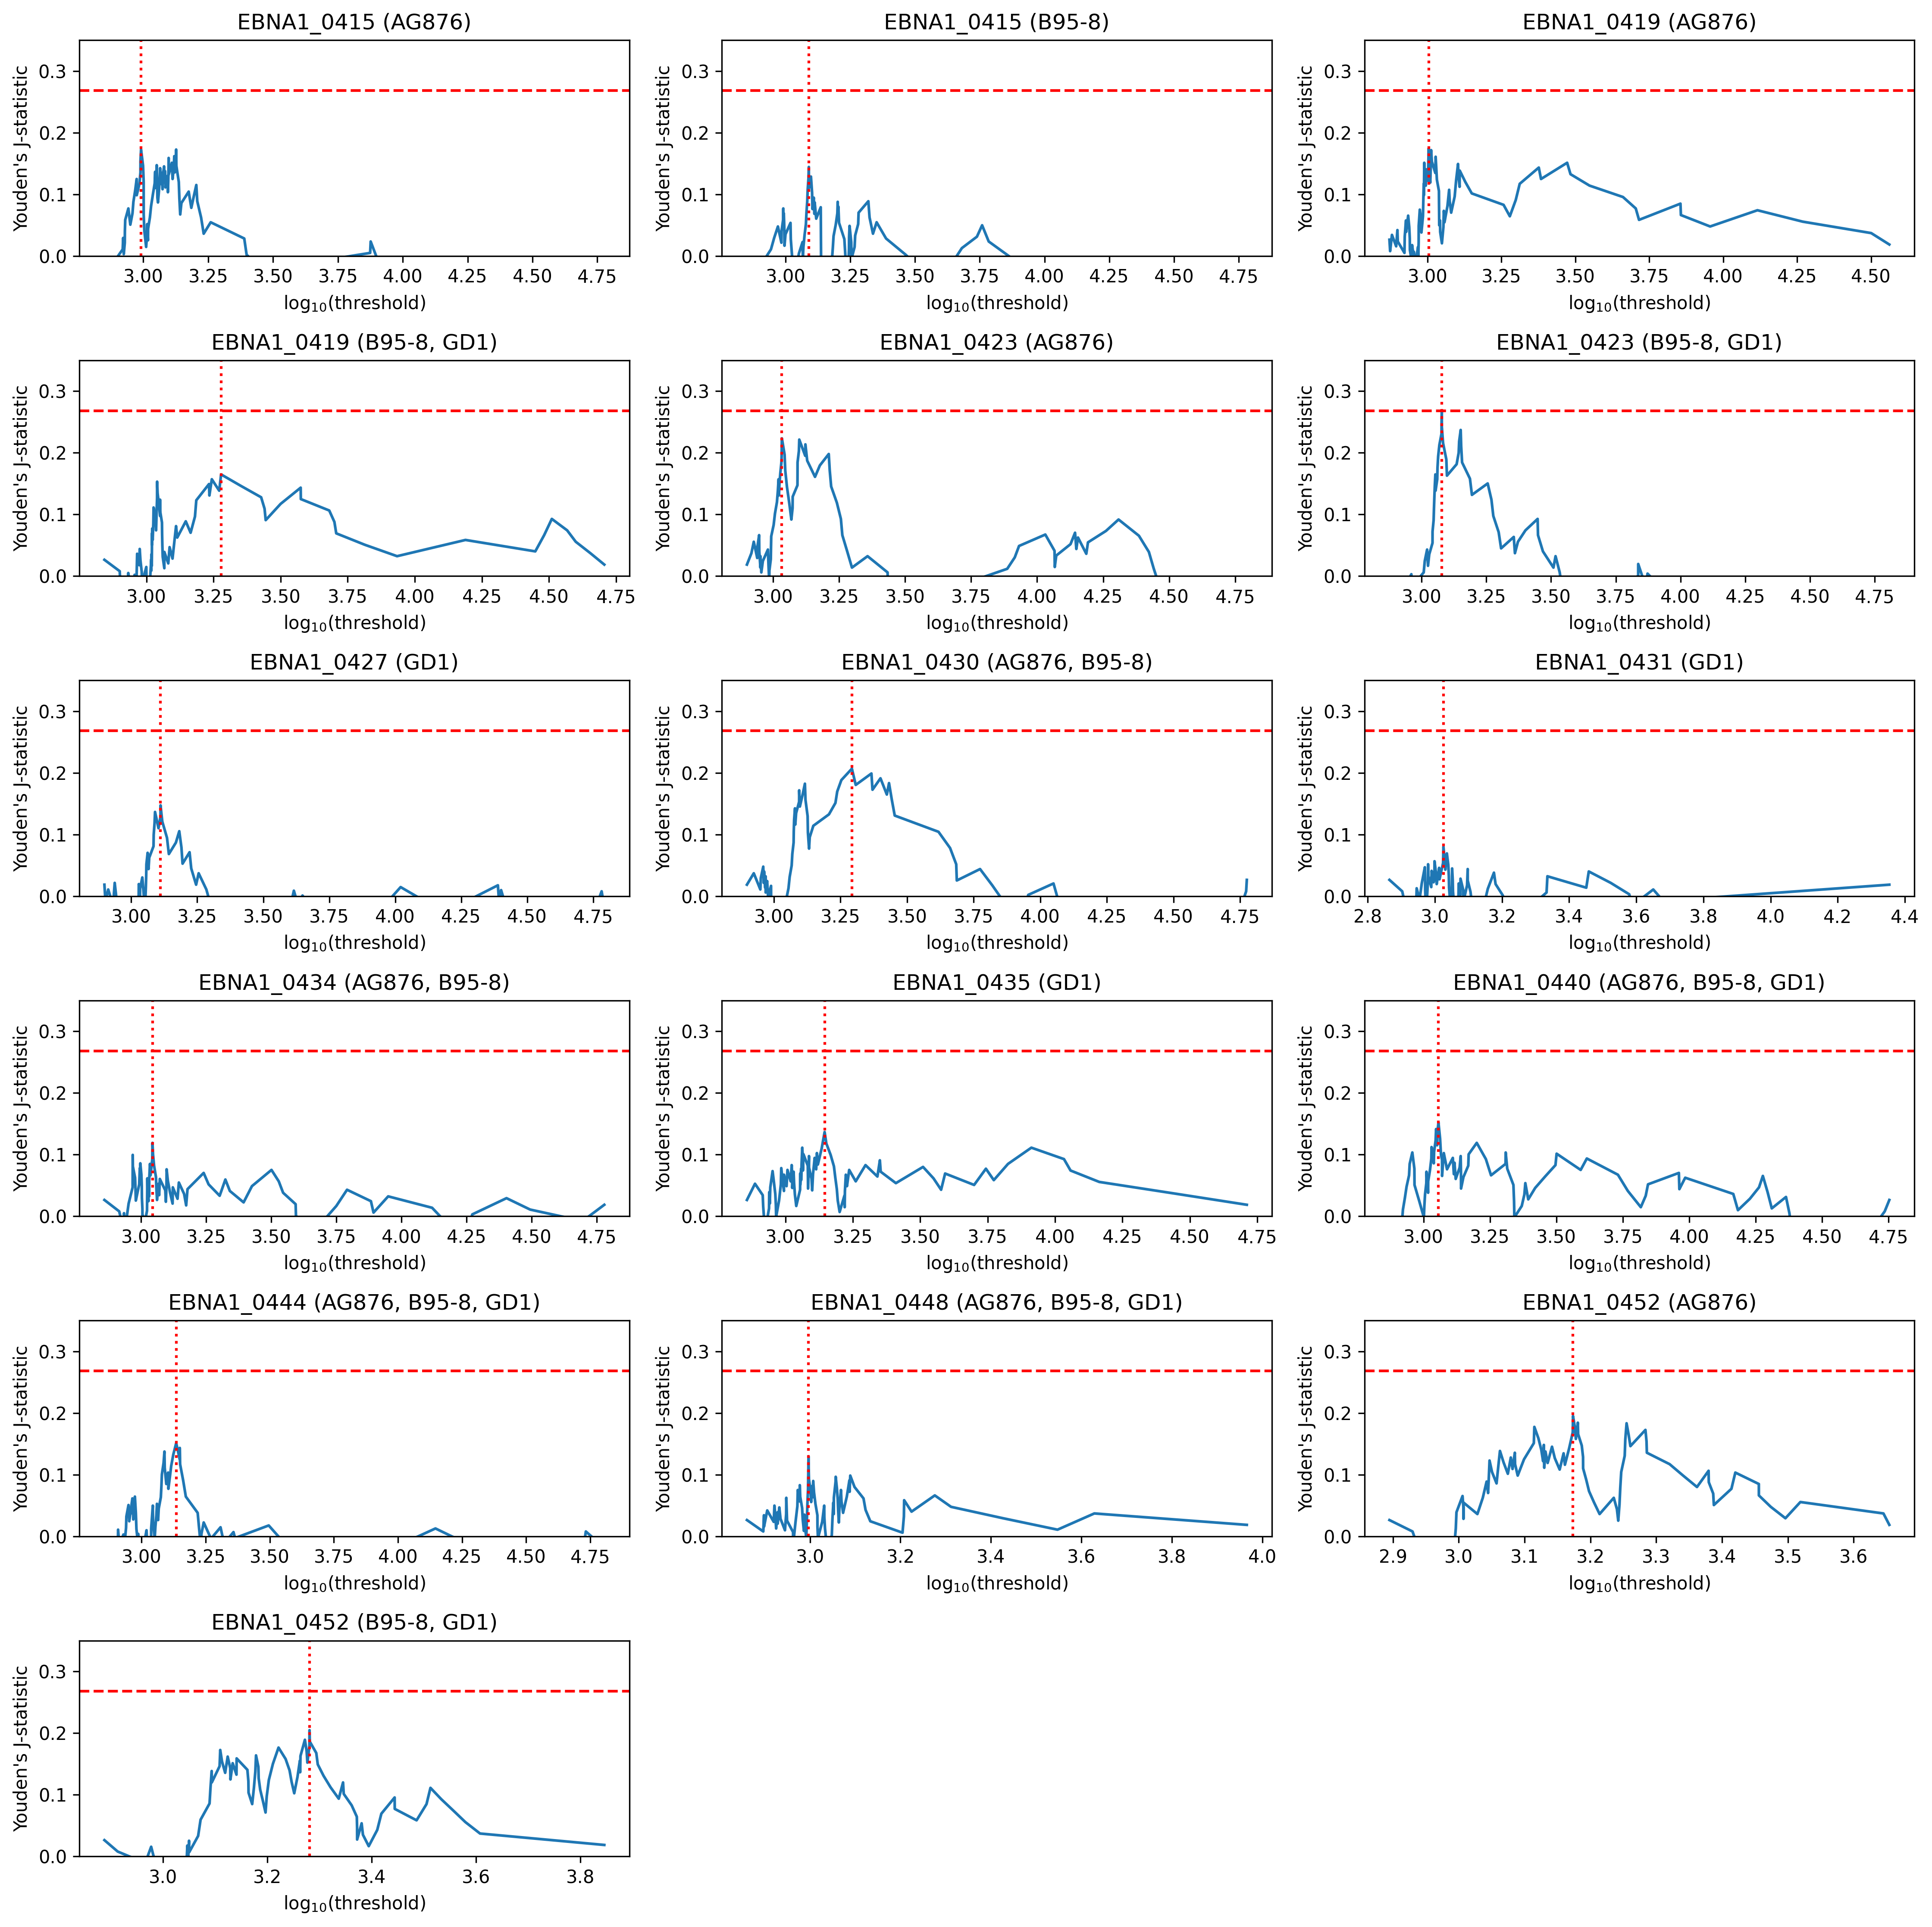

In [9]:
plot_signals_youden(smr, all_lower_bounds, youden)

**ROC01**

In [10]:
smr_roc01 = smr[['name', 'min_roc01', 'roc01_lower_bound', 'roc01_upper_bound']]
smr_roc01.columns = ['ID', "ROC01", 'lower bound', 'upper bound']
smr_roc01.iloc[:, 1:] = np.round(smr_roc01.iloc[:, 1:], 3)
smr_roc01

ID  ROC01  lower bound  upper bound
0               EBNA1_0415 (AG876)  0.605     1202.000     1211.000
1               EBNA1_0415 (B95-8)  0.639     1253.000     1265.667
2               EBNA1_0419 (AG876)  0.586     1029.000     1034.667
3          EBNA1_0419 (B95-8, GD1)  0.599     1096.333     1101.000
4               EBNA1_0423 (AG876)  0.560     1257.333     1324.333
5          EBNA1_0423 (B95-8, GD1)  0.565     1416.000     1422.000
6                 EBNA1_0427 (GD1)  0.623     1291.000     1311.000
7        EBNA1_0430 (AG876, B95-8)  0.581     1307.333     1314.000
8                 EBNA1_0431 (GD1)  0.675     1125.667     1130.333
9        EBNA1_0434 (AG876, B95-8)  0.625     1107.333     1113.000
10                EBNA1_0435 (GD1)  0.633     1155.000     1160.667
11  EBNA1_0440 (AG876, B95-8, GD1)  0.625     1586.667     1717.333
12  EBNA1_0444 (AG876, B95-8, GD1)  0.613     1228.667     1231.667
13  EBNA1_0448 (AG876, B95-8, GD1)  0.622      992.667      993.667
14              EBNA1_0452 (AG876)  0.576     1491.333     1501.333
15         EBNA1_0452 (B95-8, GD1)  0.591     1665.667     1718.667

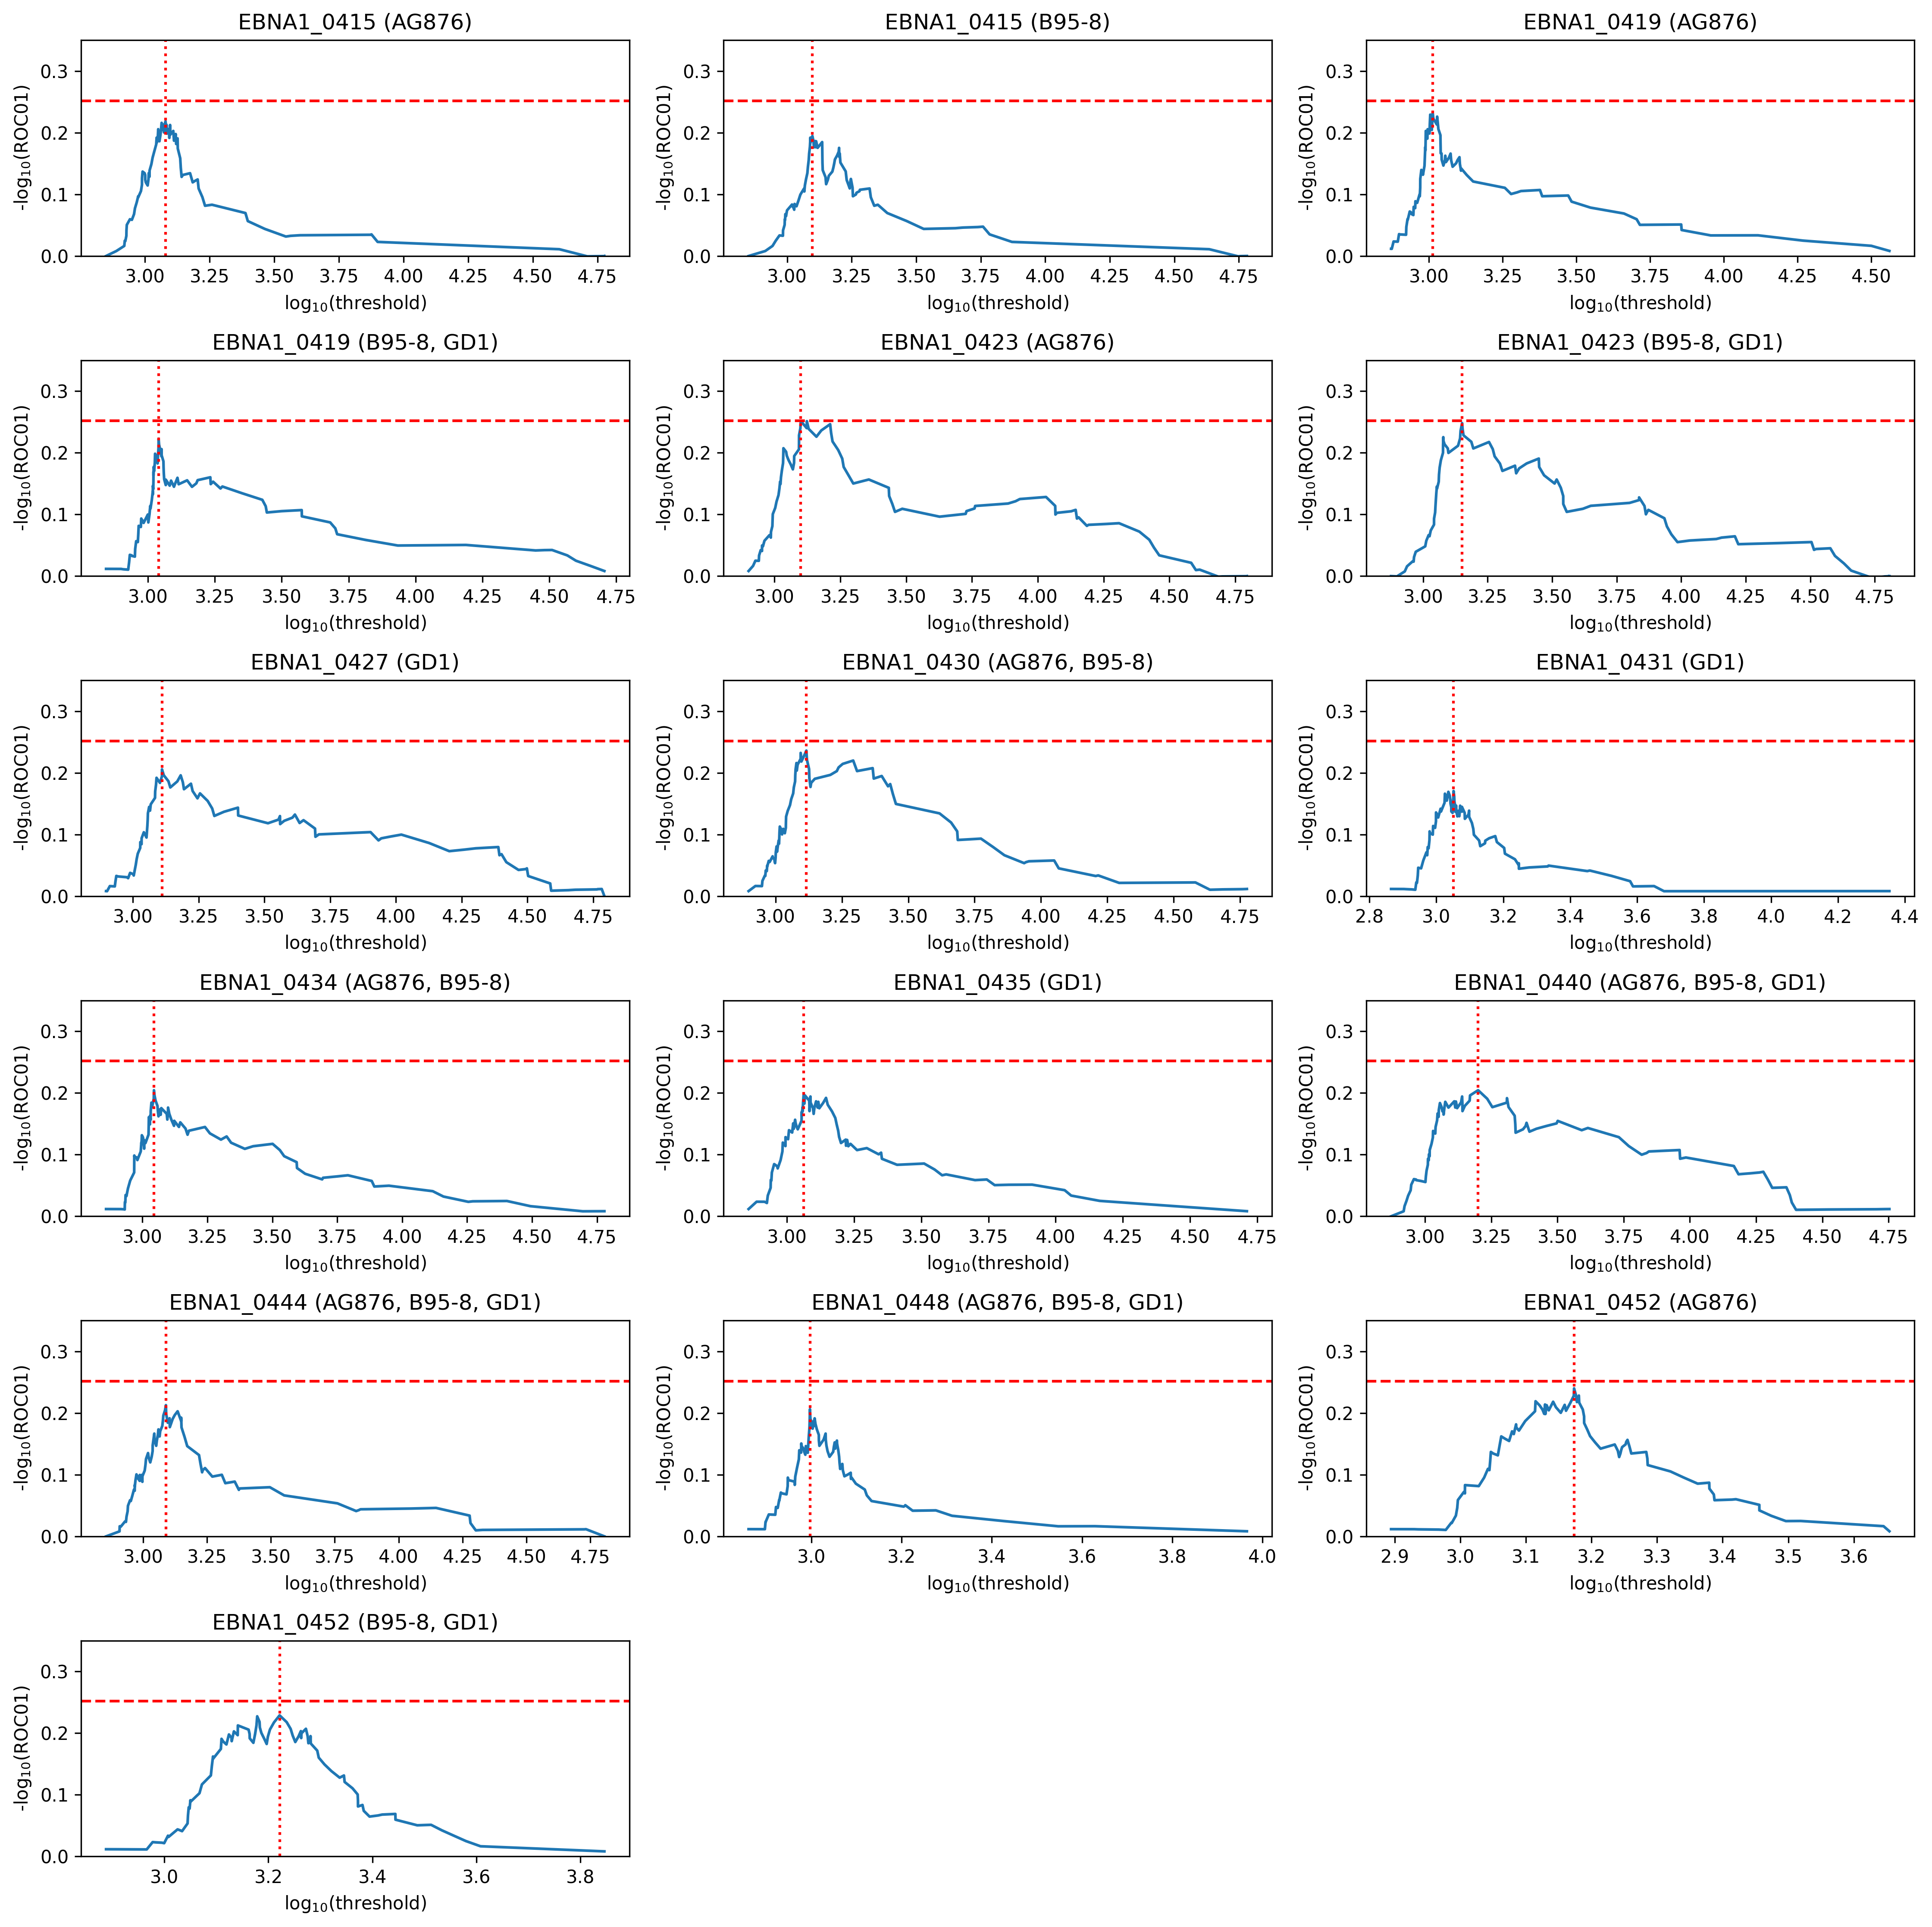

In [11]:
plot_signals_roc01(smr, all_lower_bounds, roc01)

**AUC (single threshold)**

In [12]:
smr_auc = smr[['name', 'max_auc', 'auc_lower_bound', 'auc_upper_bound']]
smr_auc.columns = ['ID', 'maximum AUC', 'lower bound', 'upper bound']
smr_auc.iloc[:, 2:] = np.round(smr_auc.iloc[:, 2:], 3)
smr_auc

ID  maximum AUC  lower bound  upper bound
0               EBNA1_0415 (AG876)     0.586257      980.000      997.667
1               EBNA1_0415 (B95-8)     0.572125     1229.667     1230.000
2               EBNA1_0419 (AG876)     0.587232     1009.667     1012.000
3          EBNA1_0419 (B95-8, GD1)     0.582359     1898.000     2248.333
4               EBNA1_0423 (AG876)     0.611598     1080.500     1106.333
5          EBNA1_0423 (B95-8, GD1)     0.634016     1197.000     1197.333
6                 EBNA1_0427 (GD1)     0.573587     1291.000     1311.000
7        EBNA1_0430 (AG876, B95-8)     0.603314     1962.333     2028.667
8                 EBNA1_0431 (GD1)     0.539961     1060.667     1068.000
9        EBNA1_0434 (AG876, B95-8)     0.559454     1107.333     1113.000
10                EBNA1_0435 (GD1)     0.568226     1398.000     1418.667
11  EBNA1_0440 (AG876, B95-8, GD1)     0.576023     1138.667     1155.000
12  EBNA1_0444 (AG876, B95-8, GD1)     0.575536     1365.333     1409.667
13  EBNA1_0448 (AG876, B95-8, GD1)     0.564815      992.667      993.667
14              EBNA1_0452 (AG876)     0.597466     1491.333     1501.333
15         EBNA1_0452 (B95-8, GD1)     0.602339     1910.000     1912.000

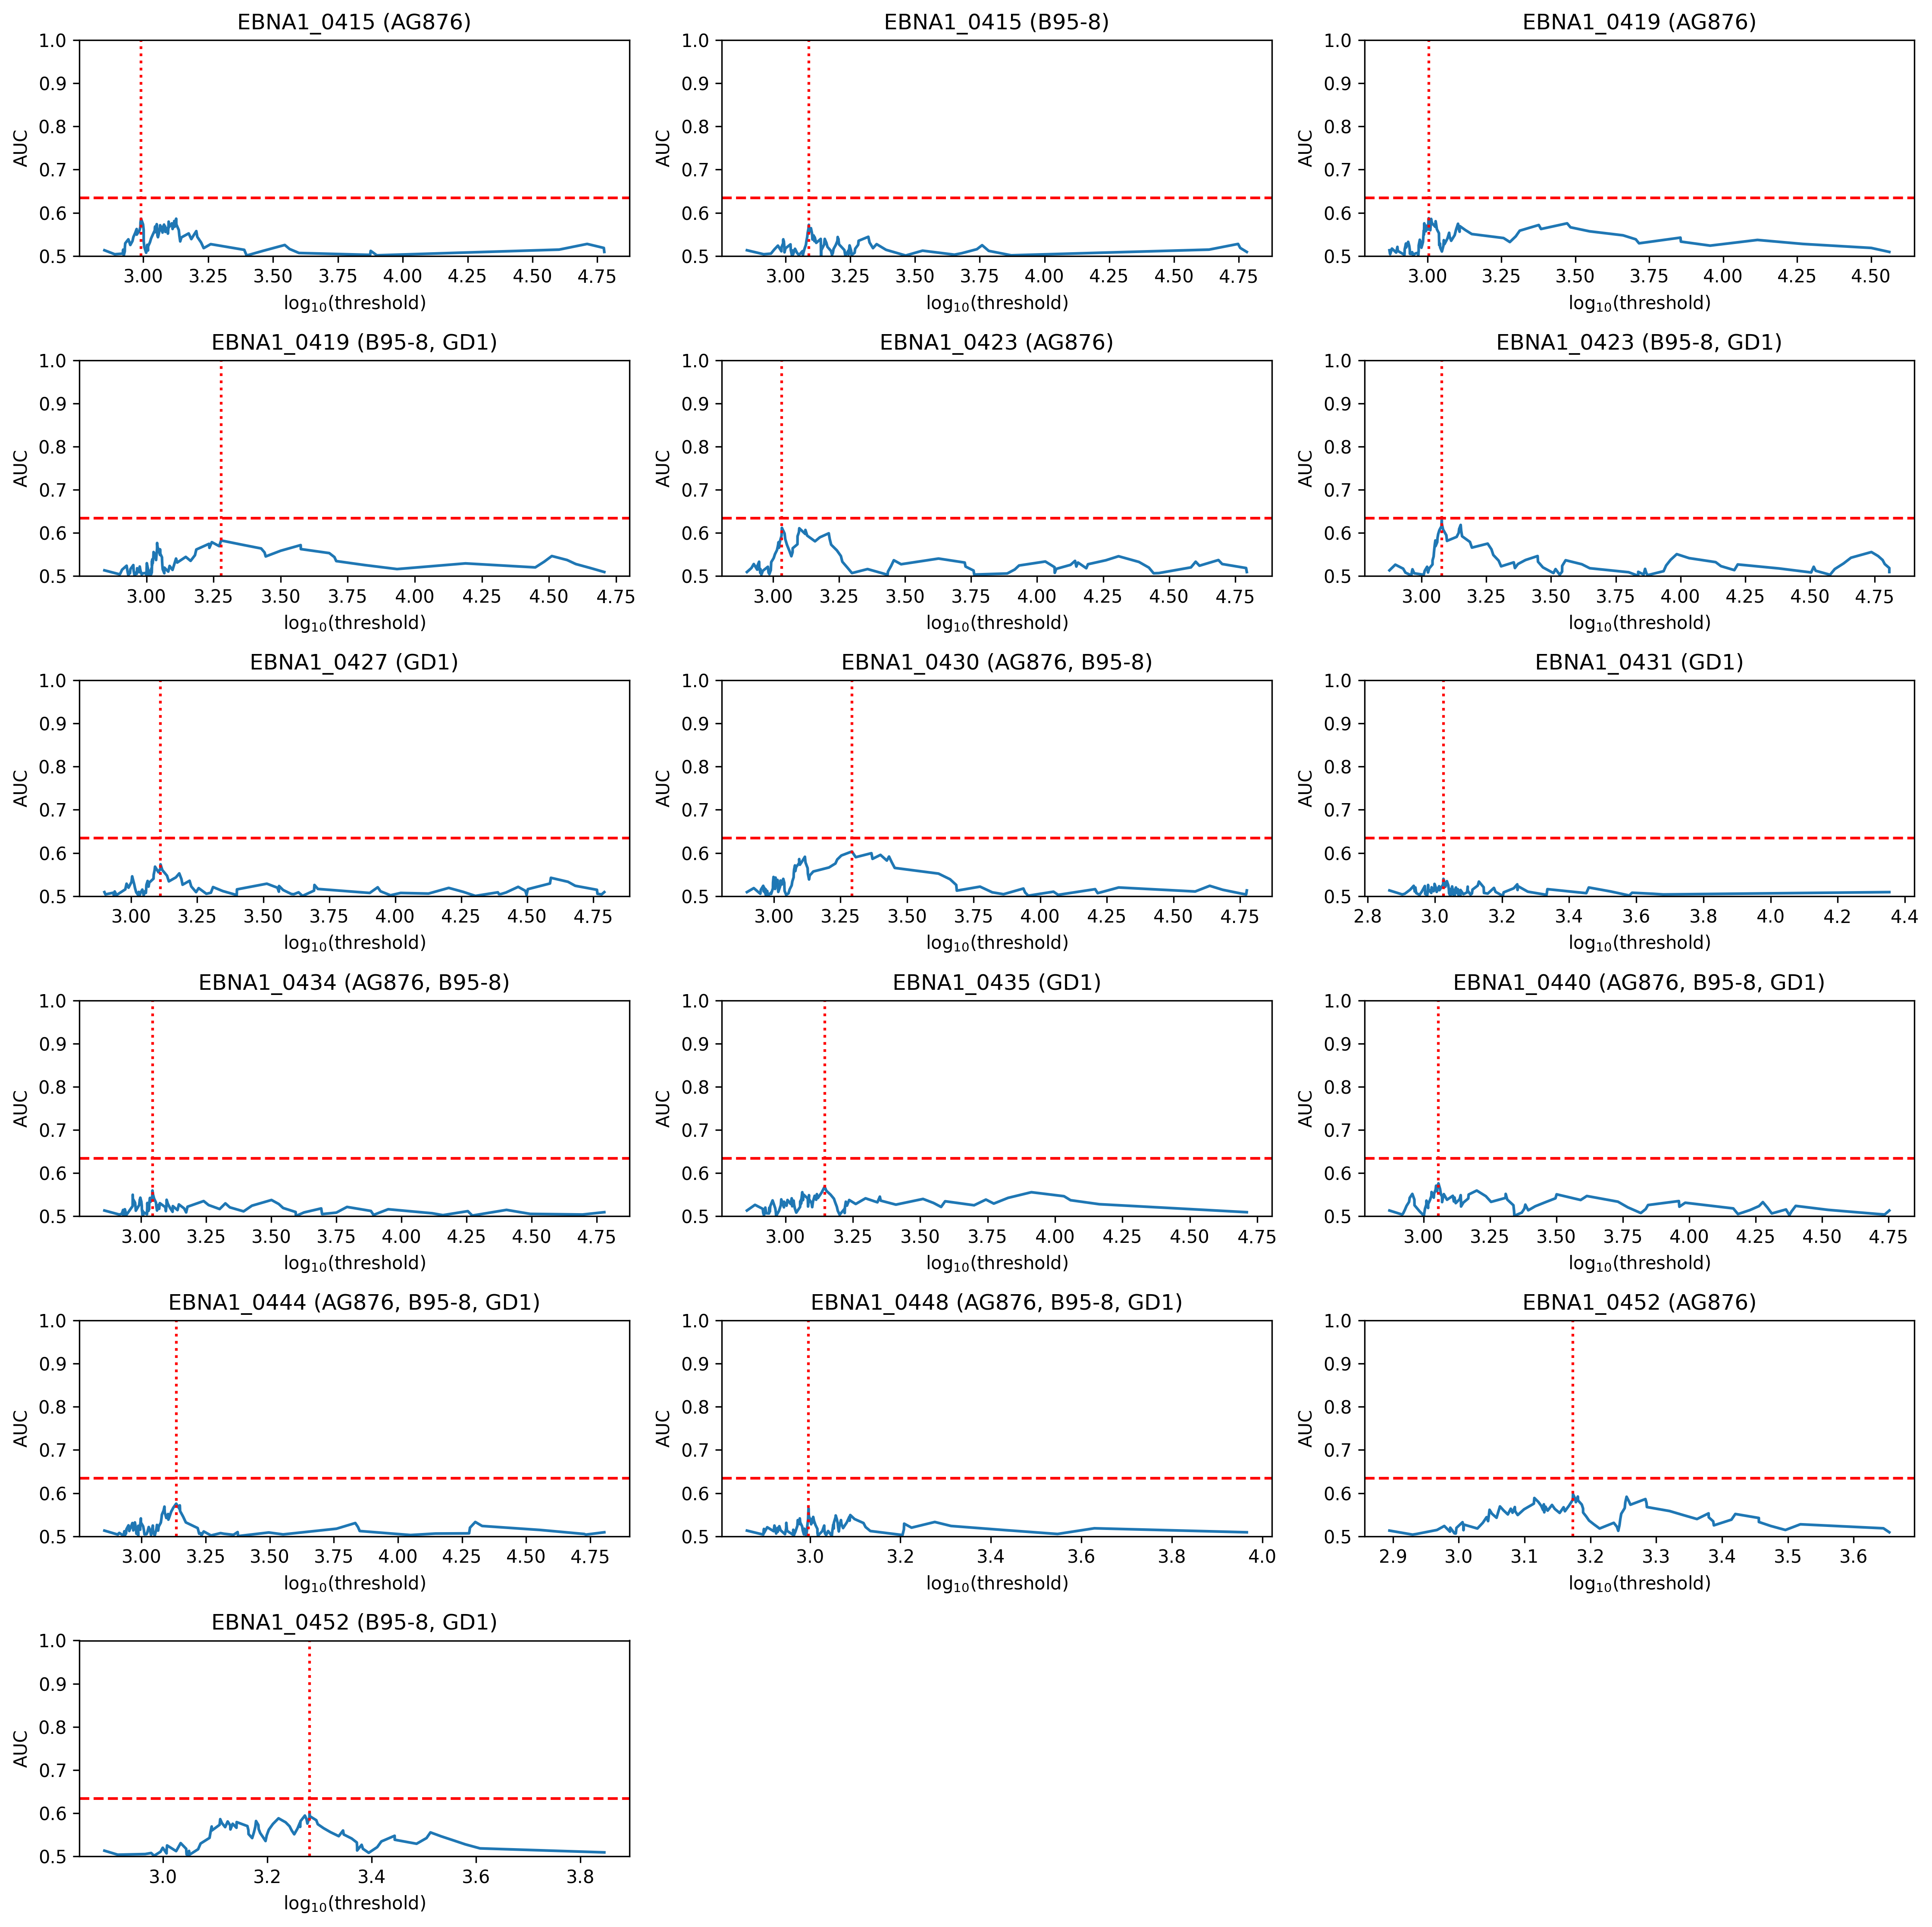

In [13]:
plot_signals_auc(smr, all_lower_bounds, auc)

**Gini decrease**

In [14]:
smr_gini = smr[['name', 'max_gini', 'gini_lower_bound', 'gini_upper_bound']]
smr_gini.columns = ['ID', 'maximum Gini decrease', 'lower bound', 'upper bound']
smr_gini.iloc[:, 2:] = np.round(smr_gini.iloc[:, 2:], 3)
smr_gini

ID  maximum Gini decrease  lower bound  \
0               EBNA1_0415 (AG876)               0.021349      980.000   
1               EBNA1_0415 (B95-8)               0.011501    55931.333   
2               EBNA1_0419 (AG876)               0.022111     2967.333   
3          EBNA1_0419 (B95-8, GD1)               0.019610    32383.000   
4               EBNA1_0423 (AG876)               0.027130     1080.500   
5          EBNA1_0423 (B95-8, GD1)               0.039124     1197.000   
6                 EBNA1_0427 (GD1)               0.012024    38894.000   
7        EBNA1_0430 (AG876, B95-8)               0.022839     1962.333   
8                 EBNA1_0431 (GD1)               0.007572      732.333   
9        EBNA1_0434 (AG876, B95-8)               0.009005      930.333   
10                EBNA1_0435 (GD1)               0.023805     8173.000   
11  EBNA1_0440 (AG876, B95-8, GD1)               0.015804      908.000   
12  EBNA1_0444 (AG876, B95-8, GD1)               0.011663     1365.333   
13  EBNA1_0448 (AG876, B95-8, GD1)               0.008470     1887.667   
14              EBNA1_0452 (AG876)               0.021692     1798.667   
15         EBNA1_0452 (B95-8, GD1)               0.023805     3256.333   

    upper bound  
0       997.667  
1     57016.000  
2      3046.000  
3     36929.333  
4      1106.333  
5      1197.333  
6     45160.333  
7      2028.667  
8       799.333  
9       930.333  
10    10797.333  
11      924.333  
12     1409.667  
13     2050.333  
14     1811.667  
15     3416.667

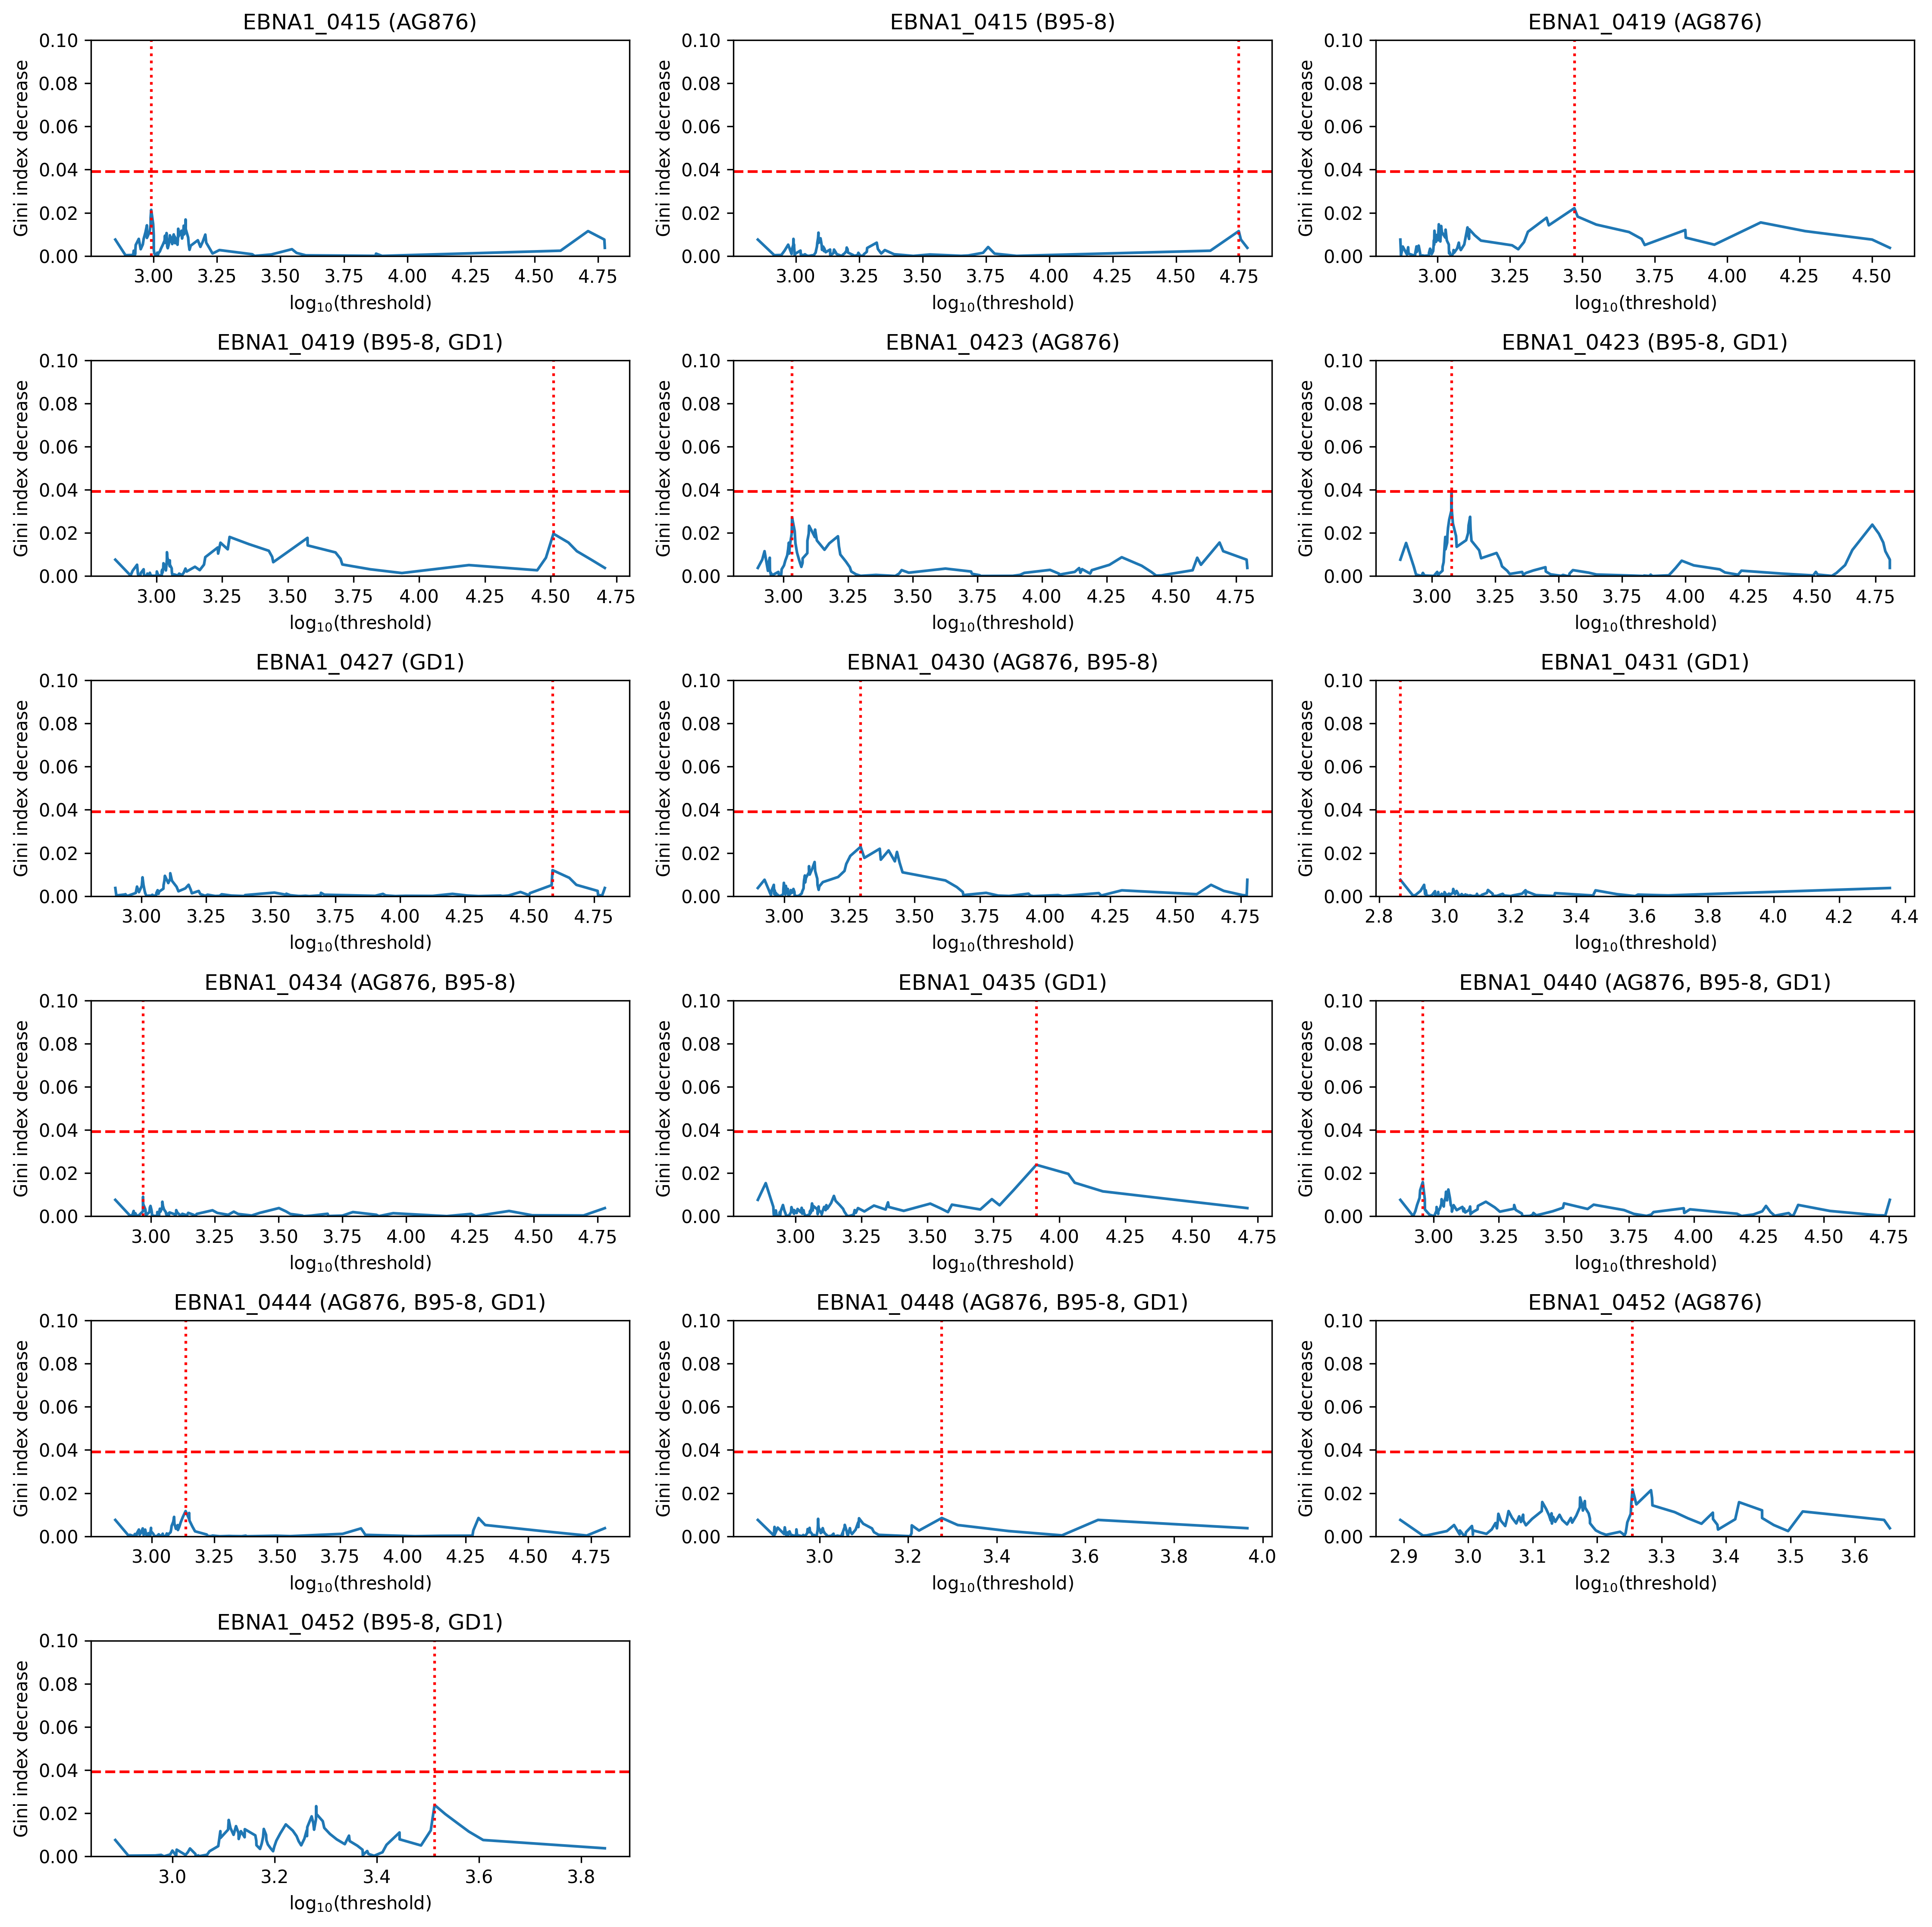

In [15]:
plot_signals_gini(smr, all_lower_bounds, gini)

**Summary of thresholds**

In [16]:
summarize_thresholds(smr)

Threshold  p-value  \
ID                             MAX AUC Method                                  
EBNA1_0415 (AG876)             0.580   Chi-square            980.00   0.0799   
                                       ROC01                1202.00   0.2451   
                                       Youden                980.00   0.0799   
                                       |Sen-Spe|            1186.00   0.4177   
                                       Gini                  980.00   0.0799   
                                       AUC (single thr.)     980.00   0.0799   
EBNA1_0415 (B95-8)             0.532   Chi-square           1229.67   0.2270   
                                       ROC01                1253.00   0.3039   
                                       Youden               1229.67   0.2270   
                                       |Sen-Spe|            1370.67   1.0000   
                                       Gini                55931.33   0.3782   
                                       AUC (single thr.)    1229.67   0.2270   
EBNA1_0419 (AG876)             0.578   Chi-square           2967.33   0.0811   
                                       ROC01                1029.00   0.1586   
                                       Youden               1009.67   0.1462   
                                       |Sen-Spe|            1034.67   0.2172   
                                       Gini                 2967.33   0.0811   
                                       AUC (single thr.)    1009.67   0.1462   
EBNA1_0419 (B95-8, GD1)        0.552   Chi-square           1898.00   0.1093   
                                       ROC01                1096.33   0.2172   
                                       Youden               1898.00   0.1093   
                                       |Sen-Spe|            1096.33   0.2172   
                                       Gini                32383.00   0.1438   
                                       AUC (single thr.)    1898.00   0.1093   
EBNA1_0423 (AG876)             0.565   Chi-square           1080.50   0.0413   
                                       ROC01                1257.33   0.0589   
                                       Youden               1080.50   0.0413   
                                       |Sen-Spe|            1626.00   0.0974   
                                       Gini                 1080.50   0.0413   
                                       AUC (single thr.)    1080.50   0.0413   
EBNA1_0423 (B95-8, GD1)        0.545   Chi-square           1197.00   0.0125   
                                       ROC01                1416.00   0.0389   
                                       Youden               1197.00   0.0125   
                                       |Sen-Spe|            2028.33   0.8323   
                                       Gini                 1197.00   0.0125   
                                       AUC (single thr.)    1197.00   0.0125   
EBNA1_0427 (GD1)               0.505   Chi-square           1291.00   0.2295   
                                       ROC01                1291.00   0.2295   
                                       Youden               1291.00   0.2295   
                                       |Sen-Spe|            1687.67   0.8323   
                                       Gini                38894.00   0.2665   
                                       AUC (single thr.)    1291.00   0.2295   
EBNA1_0430 (AG876, B95-8)      0.541   Chi-square           1962.33   0.0635   
                                       ROC01                1307.33   0.1288   
                                       Youden               1962.33   0.0635   
                                       |Sen-Spe|            1243.67   0.2172   
                                       Gini                 1962.33   0.0635   
                                       AUC (single thr.)    1962.33   0.0635   
EBNA1_0431 (GD1)               0.507   Chi-square         

In [17]:
summarize_thresholds2(smr)

Chi-squared             ROC01  \
ID                                                                   
EBNA1_0415 (AG876)                980.0 (0.0799)   1202.0 (0.2451)   
EBNA1_0415 (B95-8)               1229.67 (0.227)   1253.0 (0.3039)   
EBNA1_0419 (AG876)              2967.33 (0.0811)   1029.0 (0.1586)   
EBNA1_0419 (B95-8, GD1)          1898.0 (0.1093)  1096.33 (0.2172)   
EBNA1_0423 (AG876)               1080.5 (0.0413)  1257.33 (0.0589)   
EBNA1_0423 (B95-8, GD1)          1197.0 (0.0125)   1416.0 (0.0389)   
EBNA1_0427 (GD1)                 1291.0 (0.2295)   1291.0 (0.2295)   
EBNA1_0430 (AG876, B95-8)       1962.33 (0.0635)  1307.33 (0.1288)   
EBNA1_0431 (GD1)                1060.67 (0.5685)  1125.67 (0.8323)   
EBNA1_0434 (AG876, B95-8)        930.33 (0.3113)  1107.33 (0.3603)   
EBNA1_0435 (GD1)                 8173.0 (0.0898)   1155.0 (0.3981)   
EBNA1_0440 (AG876, B95-8, GD1)    908.0 (0.1751)  1586.67 (0.3603)   
EBNA1_0444 (AG876, B95-8, GD1)  1365.33 (0.2052)  1228.67 (0.2745)   
EBNA1_0448 (AG876, B95-8, GD1)   992.67 (0.3055)   992.67 (0.3055)   
EBNA1_0452 (AG876)               1798.67 (0.075)  1491.33 (0.1019)   
EBNA1_0452 (B95-8, GD1)          1910.0 (0.0614)  1665.67 (0.1434)   

                               Youden's J statistic         |Sen-Spe|  \
ID                                                                      
EBNA1_0415 (AG876)                   980.0 (0.0799)   1186.0 (0.4177)   
EBNA1_0415 (B95-8)                  1229.67 (0.227)     1370.67 (1.0)   
EBNA1_0419 (AG876)                 1009.67 (0.1462)  1034.67 (0.2172)   
EBNA1_0419 (B95-8, GD1)             1898.0 (0.1093)  1096.33 (0.2172)   
EBNA1_0423 (AG876)                  1080.5 (0.0413)   1626.0 (0.0974)   
EBNA1_0423 (B95-8, GD1)             1197.0 (0.0125)  2028.33 (0.8323)   
EBNA1_0427 (GD1)                    1291.0 (0.2295)  1687.67 (0.8323)   
EBNA1_0430 (AG876, B95-8)          1962.33 (0.0635)  1243.67 (0.2172)   
EBNA1_0431 (GD1)                   1060.67 (0.5685)  1125.67 (0.8323)   
EBNA1_0434 (AG876, B95-8)          1107.33 (0.3603)  1146.67 (0.8323)   
EBNA1_0435 (GD1)                    1398.0 (0.2645)  1213.33 (0.8323)   
EBNA1_0440 (AG876, B95-8, GD1)     1138.67 (0.1916)   1385.0 (0.8323)   
EBNA1_0444 (AG876, B95-8, GD1)     1365.33 (0.2052)   1167.0 (0.8323)   
EBNA1_0448 (AG876, B95-8, GD1)      992.67 (0.3055)  1013.67 (0.6989)   
EBNA1_0452 (AG876)                 1491.33 (0.1019)  1423.33 (0.4177)   
EBNA1_0452 (B95-8, GD1)             1910.0 (0.0614)  1536.33 (0.4177)   

                                             Gini AUC (single thr.)  
ID                                                                   
EBNA1_0415 (AG876)                 980.0 (0.0799)    980.0 (0.0799)  
EBNA1_0415 (B95-8)              55931.33 (0.3782)   1229.67 (0.227)  
EBNA1_0419 (AG876)               2967.33 (0.0811)  1009.67 (0.1462)  
EBNA1_0419 (B95-8, GD1)          32383.0 (0.1438)   1898.0 (0.1093)  
EBNA1_0423 (AG876)                1080.5 (0.0413)   1080.5 (0.0413)  
EBNA1_0423 (B95-8, GD1)           1197.0 (0.0125)   1197.0 (0.0125)  
EBNA1_0427 (GD1)                 38894.0 (0.2665)   1291.0 (0.2295)  
EBNA1_0430 (AG876, B95-8)        1962.33 (0.0635)  1962.33 (0.0635)  
EBNA1_0431 (GD1)                  732.33 (0.8591)  1060.67 (0.5685)  
EBNA1_0434 (AG876, B95-8)         930.33 (0.3113)  1107.33 (0.3603)  
EBNA1_0435 (GD1)                  8173.0 (0.0898)   1398.0 (0.2645)  
EBNA1_0440 (AG876, B95-8, GD1)     908.0 (0.1751)  1138.67 (0.1916)  
EBNA1_0444 (AG876, B95-8, GD1)   1365.33 (0.2052)  1365.33 (0.2052)  
EBNA1_0448 (AG876, B95-8, GD1)   1887.67 (0.4015)   992.67 (0.3055)  
EBNA1_0452 (AG876)                1798.67 (0.075)  1491.33 (0.1019)  
EBNA1_0452 (B95-8, GD1)          3256.33 (0.0898)   1910.0 (0.0614)

In [18]:
summarize_sen_spe(smr)

sensitivity                             \
                               Chi-squared ROC01 Youden's J statistic   
name                                                                    
EBNA1_0415 (AG876)                0.277778  0.59                 0.28   
EBNA1_0415 (B95-8)                0.407407  0.44                 0.41   
EBNA1_0419 (AG876)                0.203704  0.59                 0.65   
EBNA1_0419 (B95-8, GD1)           0.296296  0.57                 0.30   
EBNA1_0423 (AG876)                0.407407  0.54                 0.41   
EBNA1_0423 (B95-8, GD1)           0.425926  0.50                 0.43   
EBNA1_0427 (GD1)                  0.462963  0.46                 0.46   
EBNA1_0430 (AG876, B95-8)         0.759259  0.63                 0.76   
EBNA1_0431 (GD1)                  0.685185  0.52                 0.69   
EBNA1_0434 (AG876, B95-8)         0.888889  0.59                 0.59   
EBNA1_0435 (GD1)                  0.111111  0.61                 0.43   
EBNA1_0440 (AG876, B95-8, GD1)    0.129630  0.59                 0.39   
EBNA1_0444 (AG876, B95-8, GD1)    0.703704  0.61                 0.70   
EBNA1_0448 (AG876, B95-8, GD1)    0.629630  0.63                 0.63   
EBNA1_0452 (AG876)                0.314815  0.54                 0.54   
EBNA1_0452 (B95-8, GD1)           0.388889  0.52                 0.39   

                                                                 specifiticy  \
                               |Sen-Spe|  Gini AUC (single thr.) Chi-squared   
name                                                                           
EBNA1_0415 (AG876)                  0.56  0.28              0.28        0.89   
EBNA1_0415 (B95-8)                  0.50  0.94              0.41        0.74   
EBNA1_0419 (AG876)                  0.57  0.20              0.65        0.95   
EBNA1_0419 (B95-8, GD1)             0.57  0.09              0.30        0.87   
EBNA1_0423 (AG876)                  0.59  0.41              0.41        0.82   
EBNA1_0423 (B95-8, GD1)             0.52  0.43              0.43        0.84   
EBNA1_0427 (GD1)                    0.52  0.89              0.46        0.68   
EBNA1_0430 (AG876, B95-8)           0.57  0.76              0.76        0.45   
EBNA1_0431 (GD1)                    0.52  1.00              0.69        0.39   
EBNA1_0434 (AG876, B95-8)           0.52  0.89              0.59        0.21   
EBNA1_0435 (GD1)                    0.52  0.11              0.43        1.00   
EBNA1_0440 (AG876, B95-8, GD1)      0.52  0.13              0.39        0.97   
EBNA1_0444 (AG876, B95-8, GD1)      0.52  0.70              0.70        0.45   
EBNA1_0448 (AG876, B95-8, GD1)      0.54  0.09              0.63        0.50   
EBNA1_0452 (AG876)                  0.56  0.31              0.54        0.87   
EBNA1_0452 (B95-8, GD1)             0.56  0.11              0.39        0.82   

                                                                           \
                               ROC01 Youden's J statistic |Sen-Spe|  Gini   
name                                                                        
EBNA1_0415 (AG876)              0.55                 0.89      0.55  0.89   
EBNA1_0415 (B95-8)              0.68                 0.74      0.50  0.00   
EBNA1_0419 (AG876)              0.58                 0.53      0.58  0.95   
EBNA1_0419 (B95-8, GD1)         0.58                 0.87      0.58  1.00   
EBNA1_0423 (AG876)              0.68                 0.82      0.61  0.82   
EBNA1_0423 (B95-8, GD1)         0.74                 0.84      0.53  0.84   
EBNA1_0427 (GD1)                0.68                 0.68      0.53  0.03   
EBNA1_0430 (AG876, B95-8)       0.55                 0.45      0.58  0.45   
EBNA1_0431 (GD1)                0.53                 0.39      0.53  0.03   
EBNA1_0434 (AG876, B95-8)       0.53                 0.53      0.53  0.21   
EBNA1_0435 (GD1)                0.50                 0.71      0.53  1.00   
EBNA1_0440 (AG876, B95-8, GD1)  0.53        

# Confidence intervals

In [19]:
smr_copy = smr[['name', 'proportion_min_g1', 'test_g1_prop_above', 'proportion_max_g1', 'proportion_min_g2', 'test_g2_prop_above', 'proportion_max_g2']]
smr_copy.columns = ['ID', 'infected CFS (min)', 'infected CFS (mean)', 'infected CFS (max)', 'uninfected CFS (min)', 'uninfected CFS (mean)', 'uninfected CFS (max)']
smr_copy.iloc[:, 1:] = np.round(smr_copy.iloc[:, 1:], 2)
smr_copy

ID  infected CFS (min)  infected CFS (mean)  \
0               EBNA1_0415 (AG876)                0.60                 0.72   
1               EBNA1_0415 (B95-8)                0.46                 0.59   
2               EBNA1_0419 (AG876)                0.10                 0.20   
3          EBNA1_0419 (B95-8, GD1)                0.17                 0.30   
4               EBNA1_0423 (AG876)                0.46                 0.59   
5          EBNA1_0423 (B95-8, GD1)                0.44                 0.57   
6                 EBNA1_0427 (GD1)                0.40                 0.54   
7        EBNA1_0430 (AG876, B95-8)                0.13                 0.24   
8                 EBNA1_0431 (GD1)                0.56                 0.69   
9        EBNA1_0434 (AG876, B95-8)                0.81                 0.89   
10                EBNA1_0435 (GD1)                0.03                 0.11   
11  EBNA1_0440 (AG876, B95-8, GD1)                0.78                 0.87   
12  EBNA1_0444 (AG876, B95-8, GD1)                0.17                 0.30   
13  EBNA1_0448 (AG876, B95-8, GD1)                0.50                 0.63   
14              EBNA1_0452 (AG876)                0.19                 0.31   
15         EBNA1_0452 (B95-8, GD1)                0.26                 0.39   

    infected CFS (max)  uninfected CFS (min)  uninfected CFS (mean)  \
0                 0.84                  0.80                   0.89   
1                 0.72                  0.60                   0.74   
2                 0.31                  0.00                   0.05   
3                 0.42                  0.02                   0.13   
4                 0.72                  0.69                   0.82   
5                 0.71                  0.73                   0.84   
6                 0.67                  0.54                   0.68   
7                 0.35                  0.29                   0.45   
8                 0.81                  0.45                   0.61   
9                 0.97                  0.66                   0.79   
10                0.19                  0.00                   0.00   
11                0.96                  0.92                   0.97   
12                0.42                  0.29                   0.45   
13                0.76                  0.34                   0.50   
14                0.44                  0.02                   0.13   
15                0.52                  0.06                   0.18   

    uninfected CFS (max)  
0                   0.99  
1                   0.88  
2                   0.12  
3                   0.24  
4                   0.94  
5                   0.96  
6                   0.83  
7                   0.61  
8                   0.76  
9                   0.92  
10                  0.00  
11                  1.00  
12                  0.61  
13                  0.66  
14                  0.24  
15                  0.31

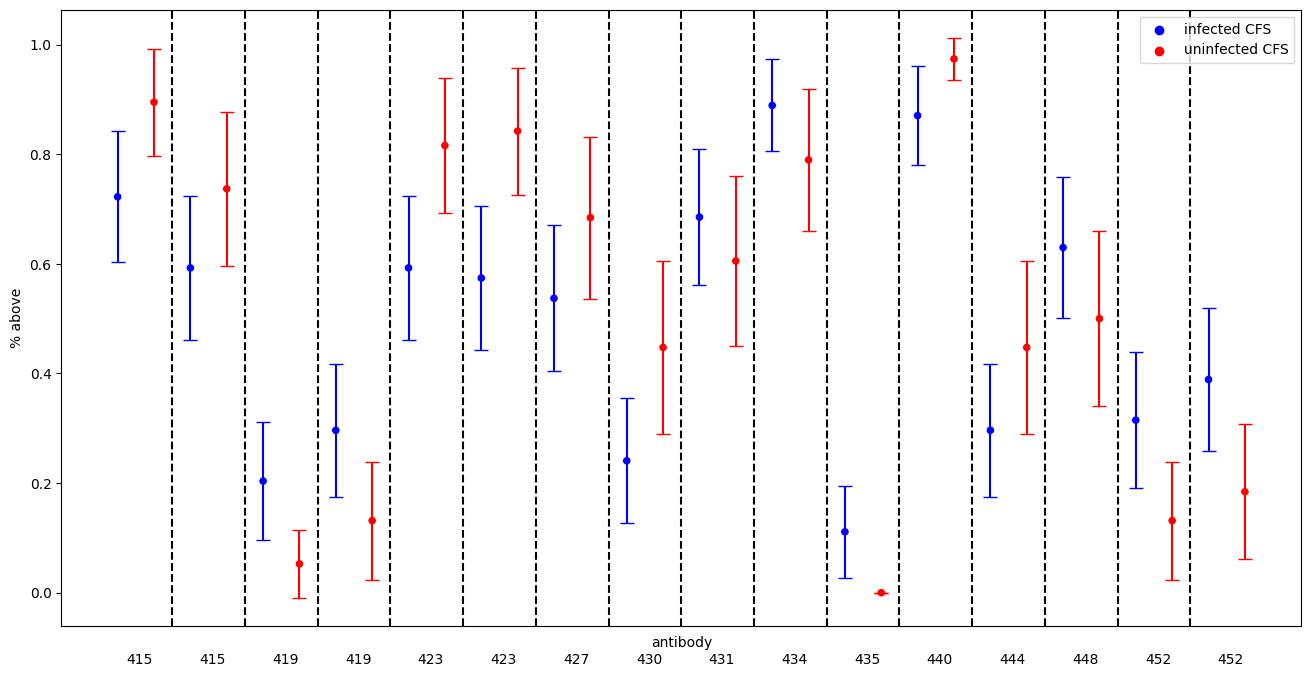

In [20]:
plot_conf_int(smr, 'infected CFS', 'uninfected CFS')

# Multiple testing correction

In [21]:
ag876 = 'FEYHQEGGPDGEPDMPPGAIEQGPADDPGEGPSTGPRGQGDGGRRKKGGWYG'
ag876_stop = [15, 19, 23, 30, 34, 40, 44, 48, 52]
ag876_target = 16
b958 = 'FEYHQEGGPDGEPDVPPGAIEQGPADDPGEGPSTGPRGQGDGGRRKKGGWFG'
b958_stop = [15, 19, 23, 30, 34, 40, 44, 48, 52]
b958_target = 16
gd1 = 'QEGGPDGEPDVPPGAIEQGPTDDPGEGPSTGPRGQGDGGRRKKGGWFG'
gd1_stop = [15, 19, 23, 27, 31, 36, 40, 44, 48]
gd1_target = 12

In [22]:
adj_p_values_bonf = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'bonferroni')[1])
adj_p_values_bh = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_bh')[1])
adj_p_values_by = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_by')[1])
adj_p_values_bky = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_tsbky')[1])

In [23]:
adj_p_values = [adj_p_values_bonf, adj_p_values_bh, adj_p_values_by, adj_p_values_bky]
correction_types = ['Bonferroni' ,'Benjamini-Hochberg', 'Benjamini-Yekutieli', '2-stage Benjamini-Krieger-Yekutieli']
strains = ['AG876', 'B95-8', 'GD1']
strain_seqs = [ag876, b958, gd1]
strain_stops = [ag876_stop, b958_stop, gd1_stop]
strain_targets = [ag876_target, b958_target, gd1_target]

In [24]:
pvals = np.round(pd.DataFrame({k:v for k,v in zip(correction_types, adj_p_values)}), 3)
pvals.insert(0, 'ID', smr.name)
pvals

ID  Bonferroni  Benjamini-Hochberg  \
0               EBNA1_0415 (AG876)      -0.000               0.746   
1               EBNA1_0415 (B95-8)      -0.000               0.549   
2               EBNA1_0419 (AG876)      -0.000               0.746   
3          EBNA1_0419 (B95-8, GD1)      -0.000               0.711   
4               EBNA1_0423 (AG876)       0.180               0.746   
5          EBNA1_0423 (B95-8, GD1)       0.698               0.746   
6                 EBNA1_0427 (GD1)      -0.000               0.549   
7        EBNA1_0430 (AG876, B95-8)      -0.000               0.746   
8                 EBNA1_0431 (GD1)      -0.000               0.245   
9        EBNA1_0434 (AG876, B95-8)      -0.000               0.479   
10                EBNA1_0435 (GD1)      -0.000               0.746   
11  EBNA1_0440 (AG876, B95-8, GD1)      -0.000               0.553   
12  EBNA1_0444 (AG876, B95-8, GD1)      -0.000               0.549   
13  EBNA1_0448 (AG876, B95-8, GD1)      -0.000               0.479   
14              EBNA1_0452 (AG876)      -0.000               0.746   
15         EBNA1_0452 (B95-8, GD1)       0.008               0.746   

    Benjamini-Yekutieli  2-stage Benjamini-Krieger-Yekutieli  
0                 0.217                                0.725  
1                 0.020                                0.528  
2                 0.217                                0.725  
3                 0.182                                0.690  
4                 0.217                                0.725  
5                 0.217                                0.725  
6                 0.020                                0.528  
7                 0.217                                0.725  
8                -0.000                                0.224  
9                -0.000                                0.458  
10                0.217                                0.725  
11                0.024                                0.531  
12                0.020                                0.528  
13               -0.000                                0.458  
14                0.217                                0.725  
15                0.217                                0.725

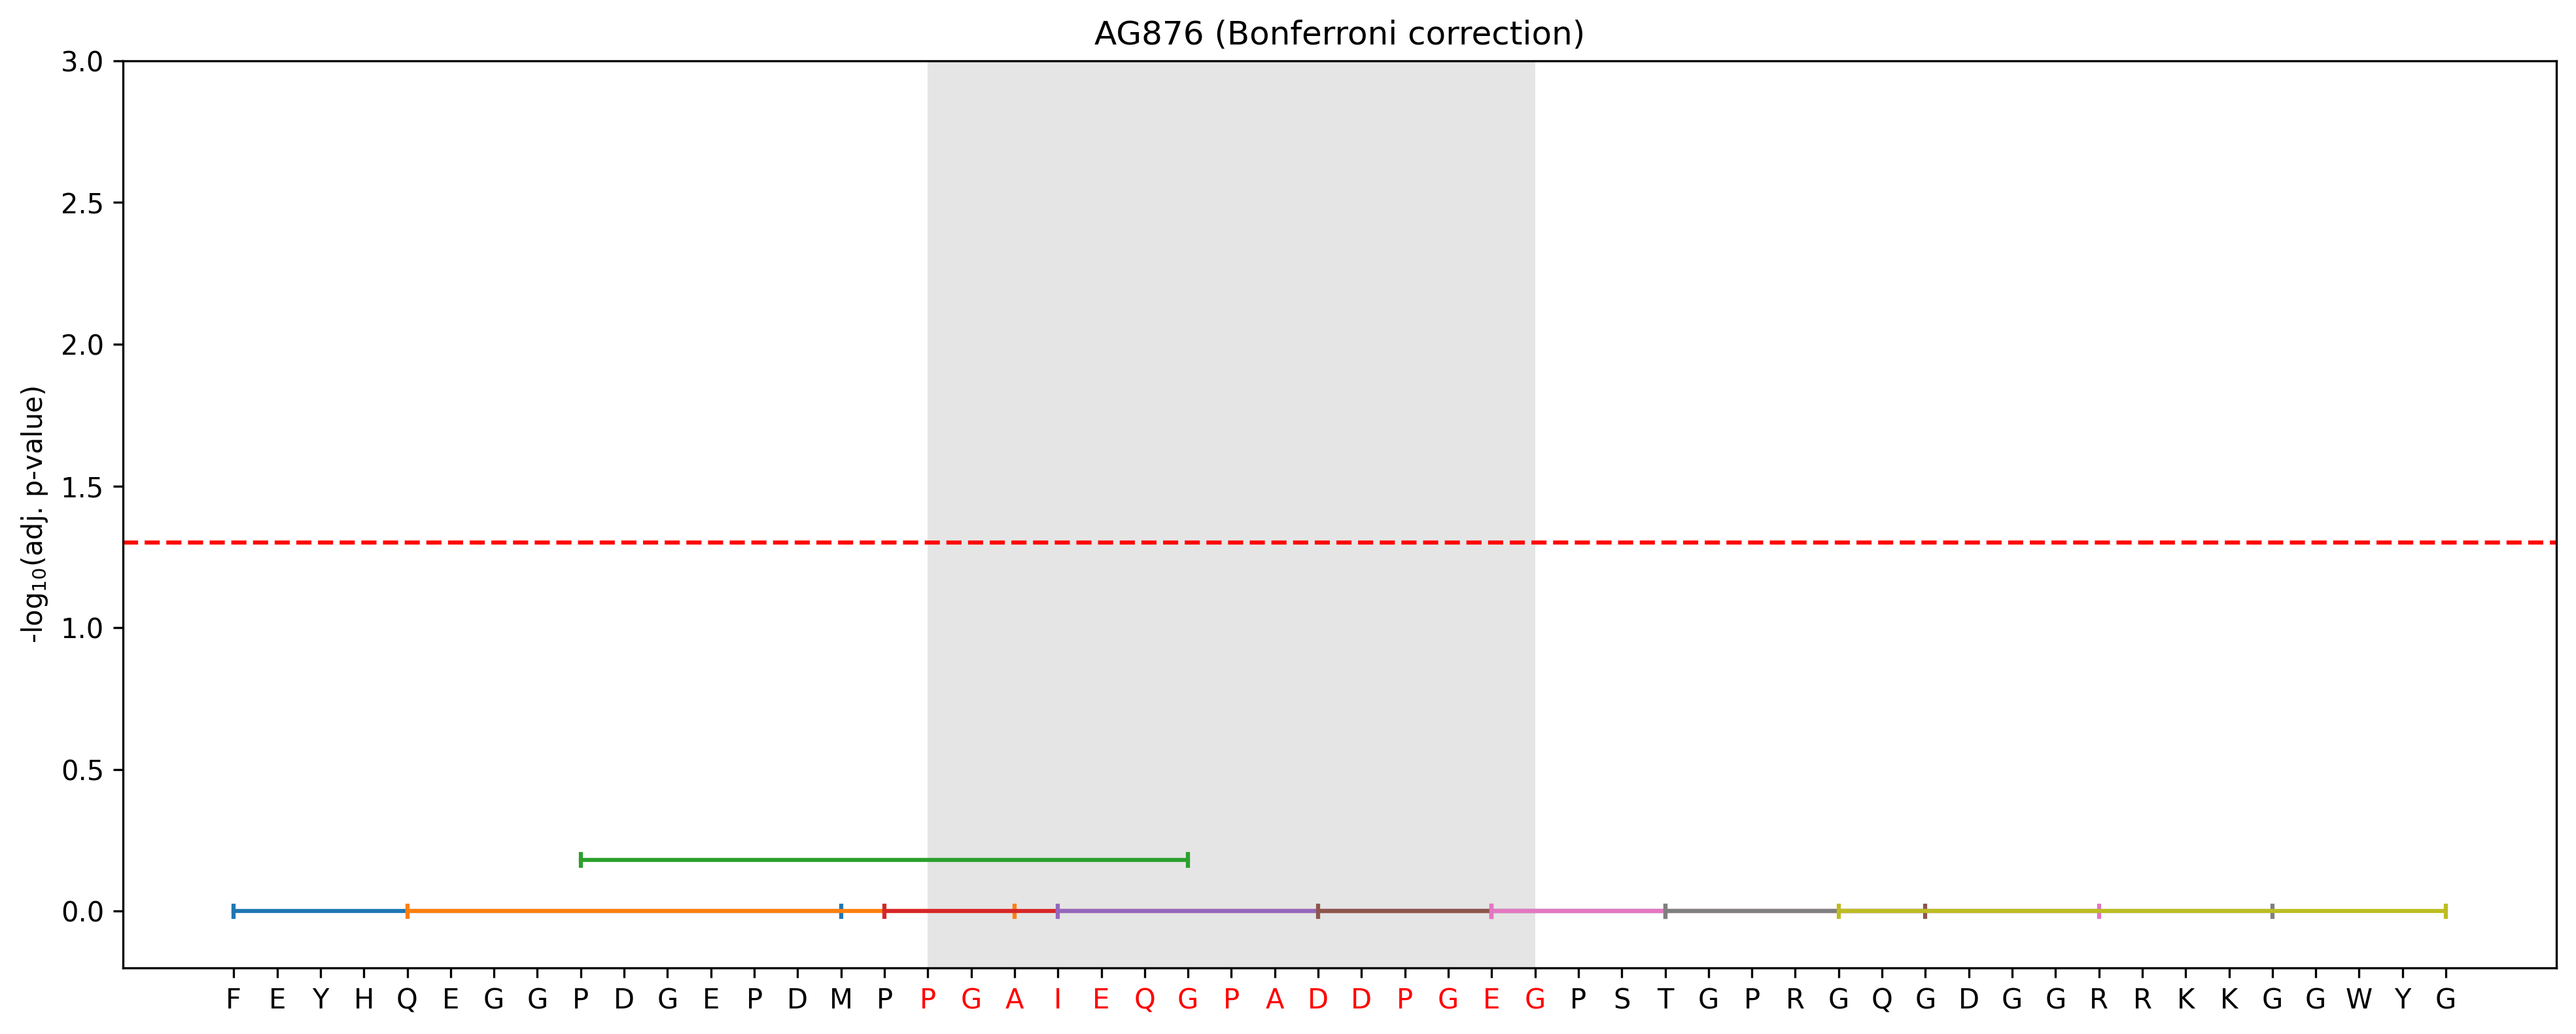

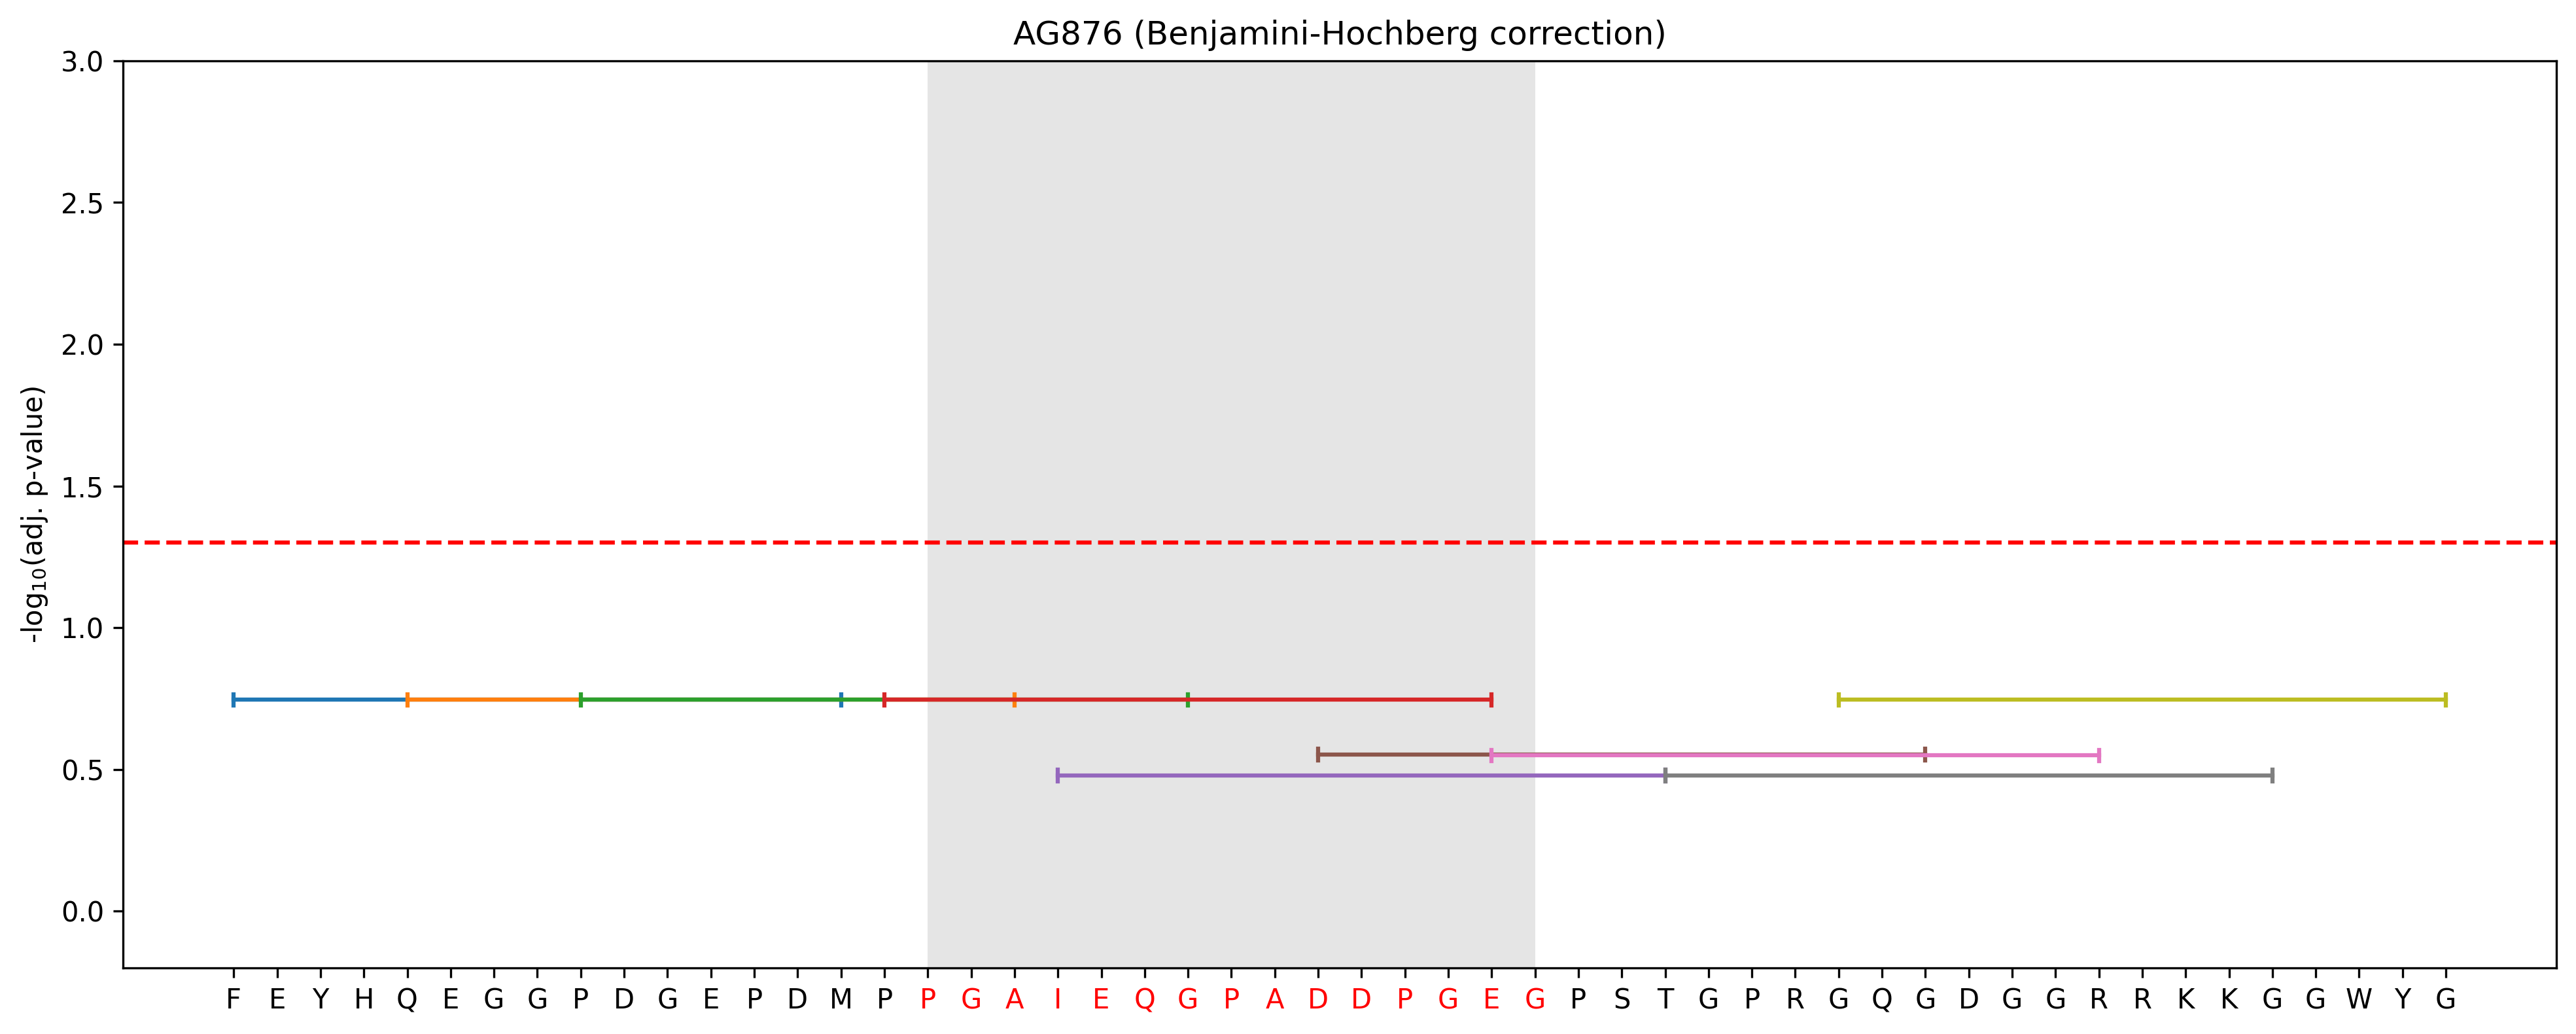

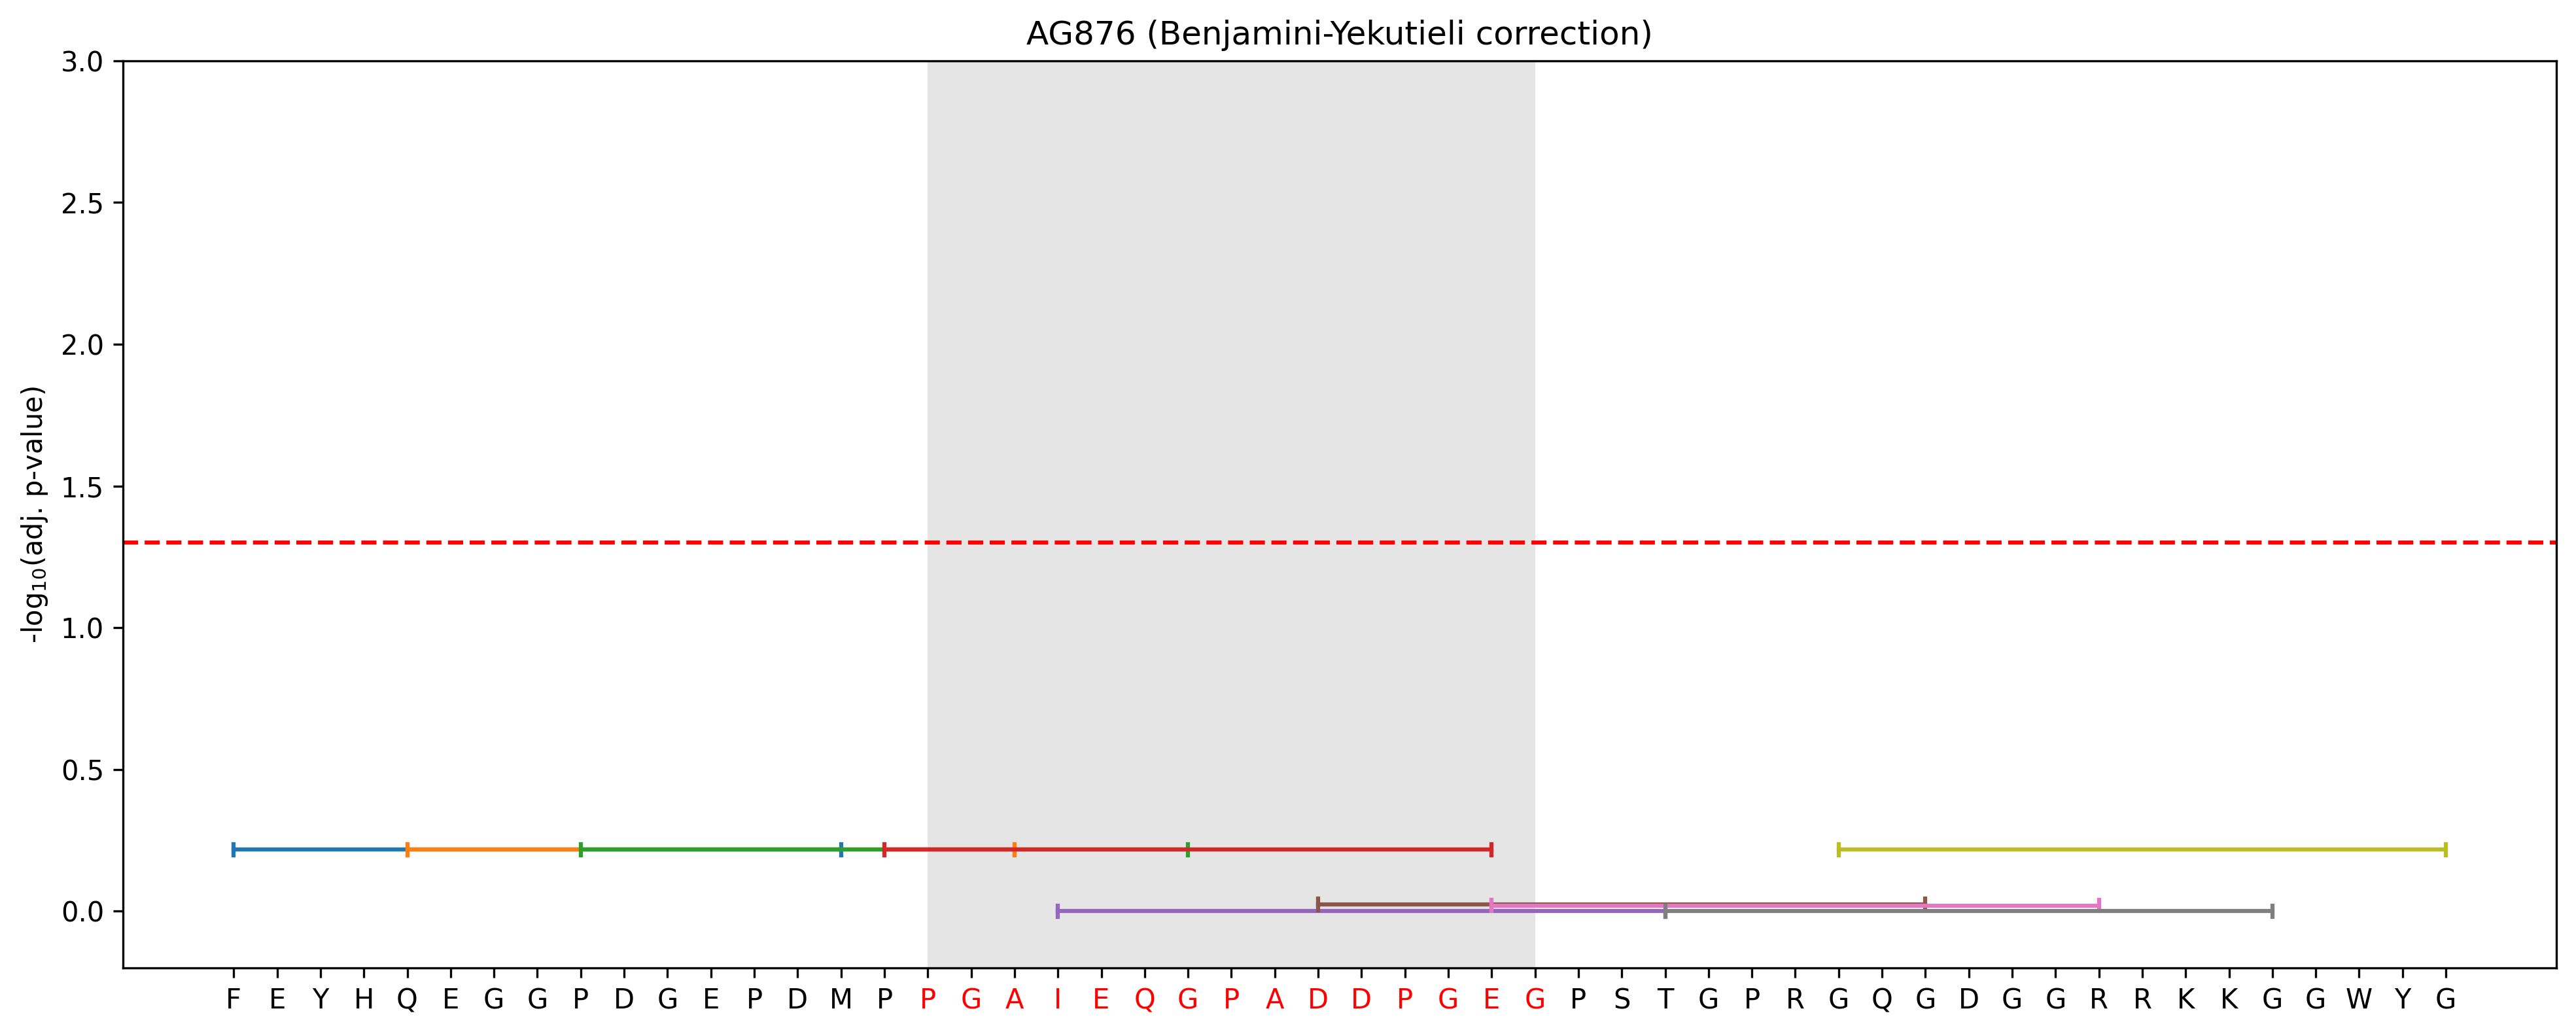

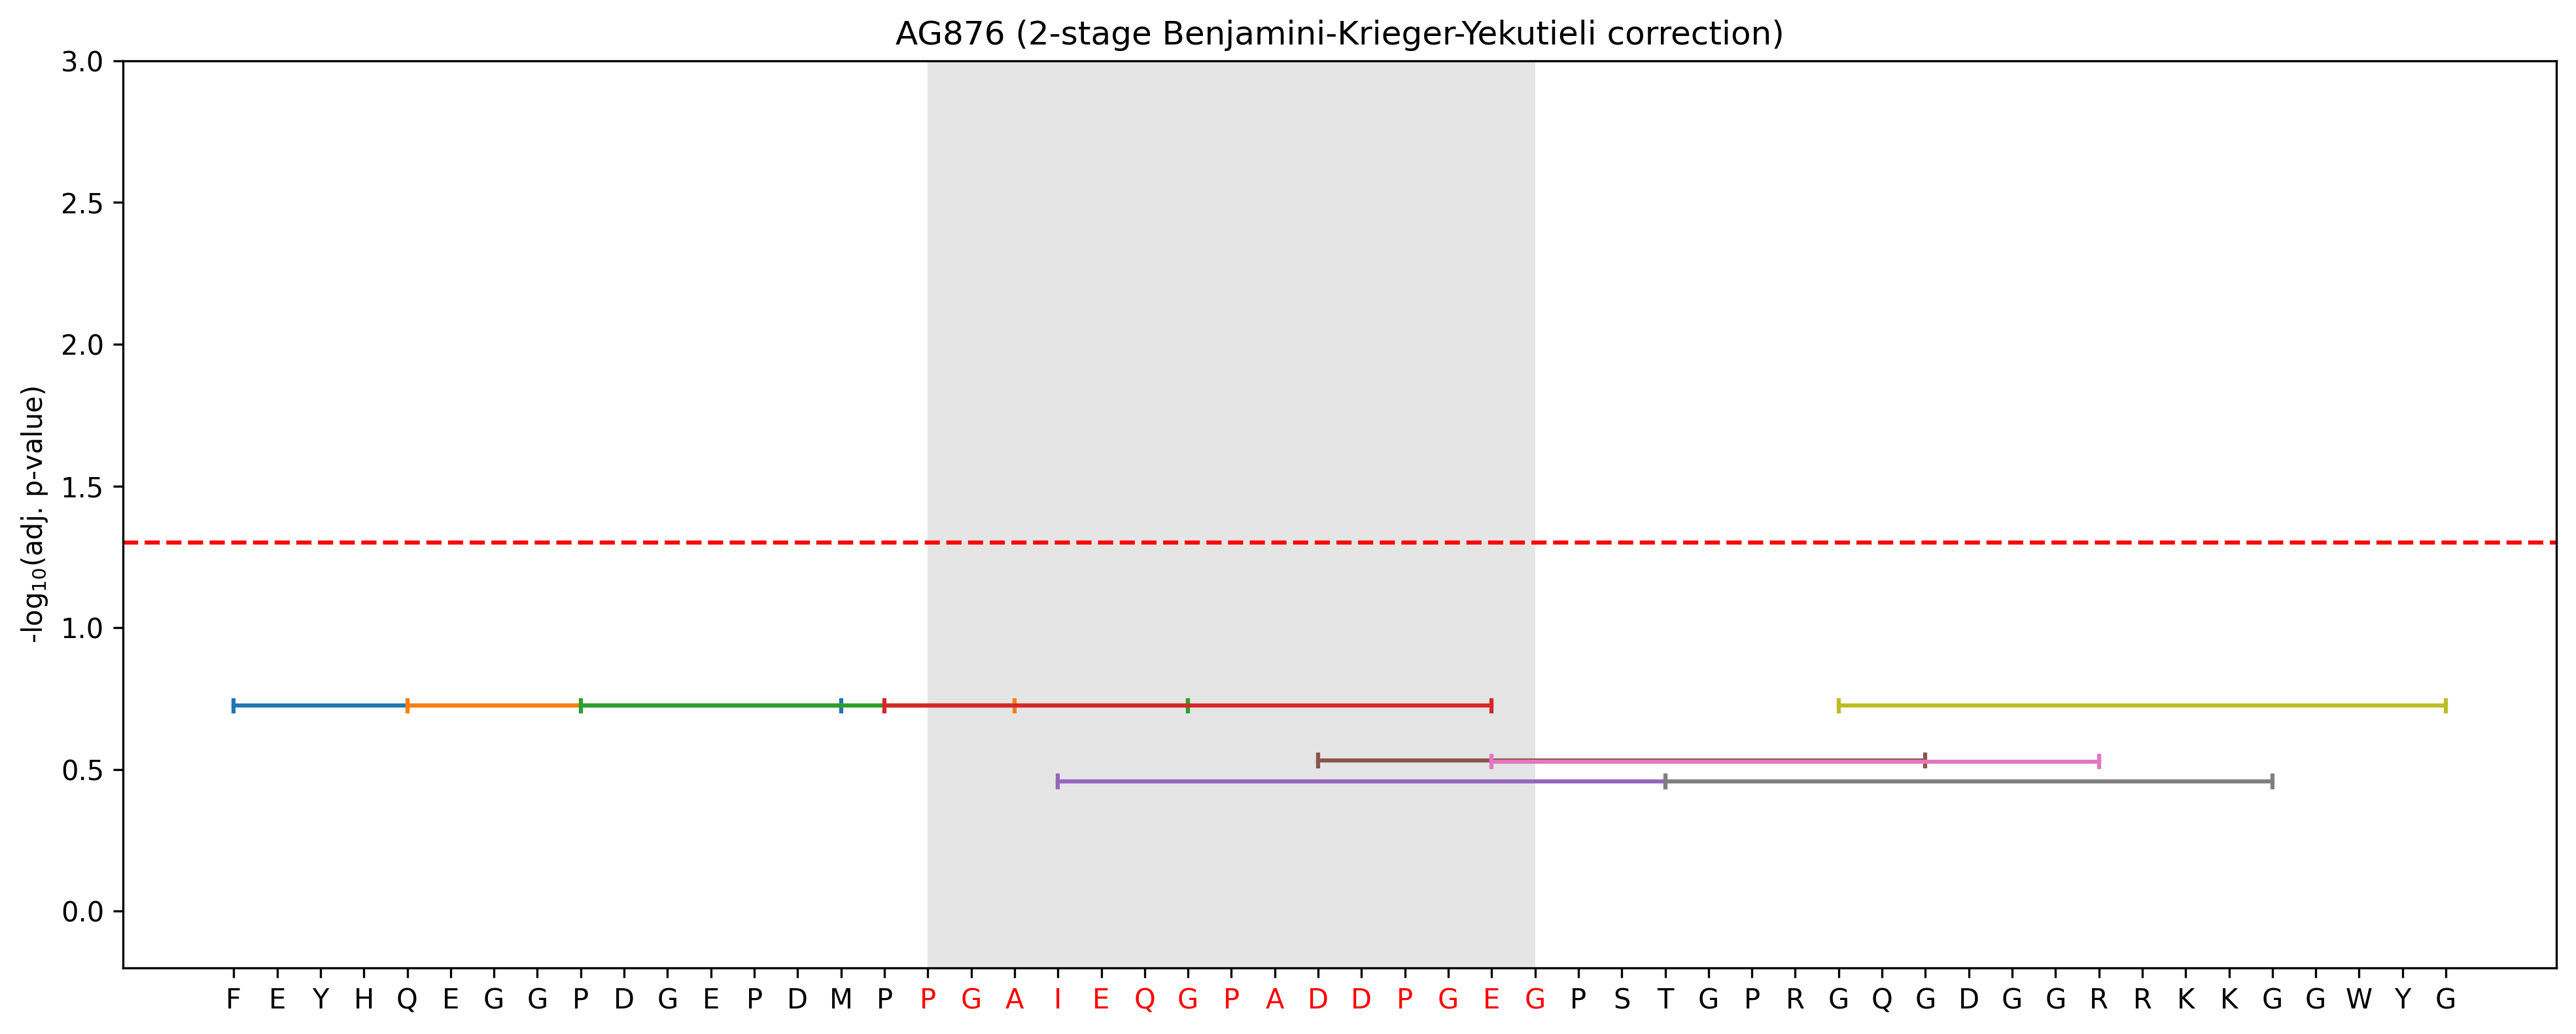

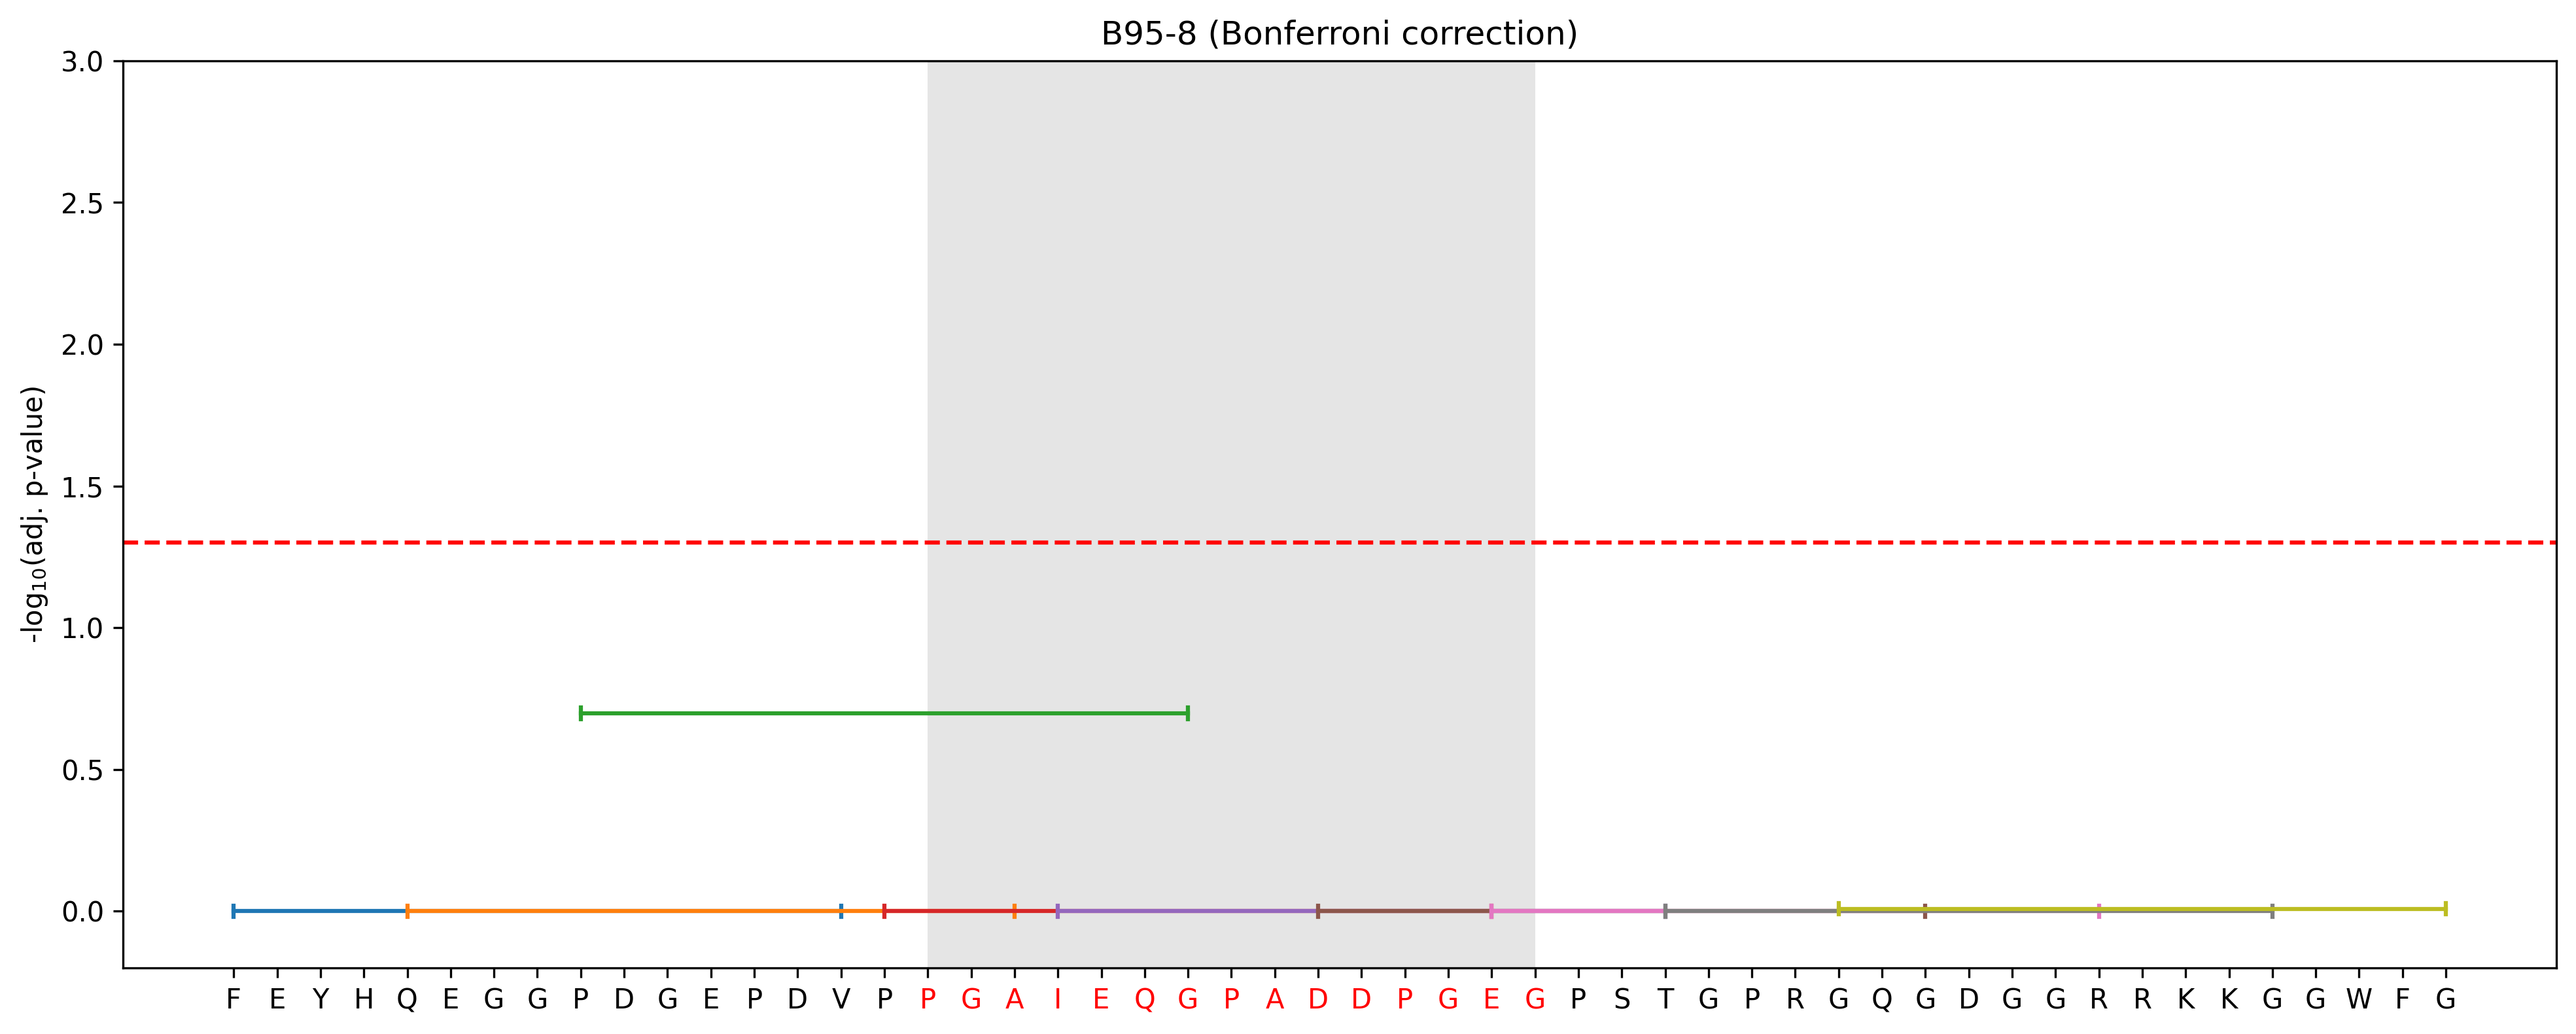

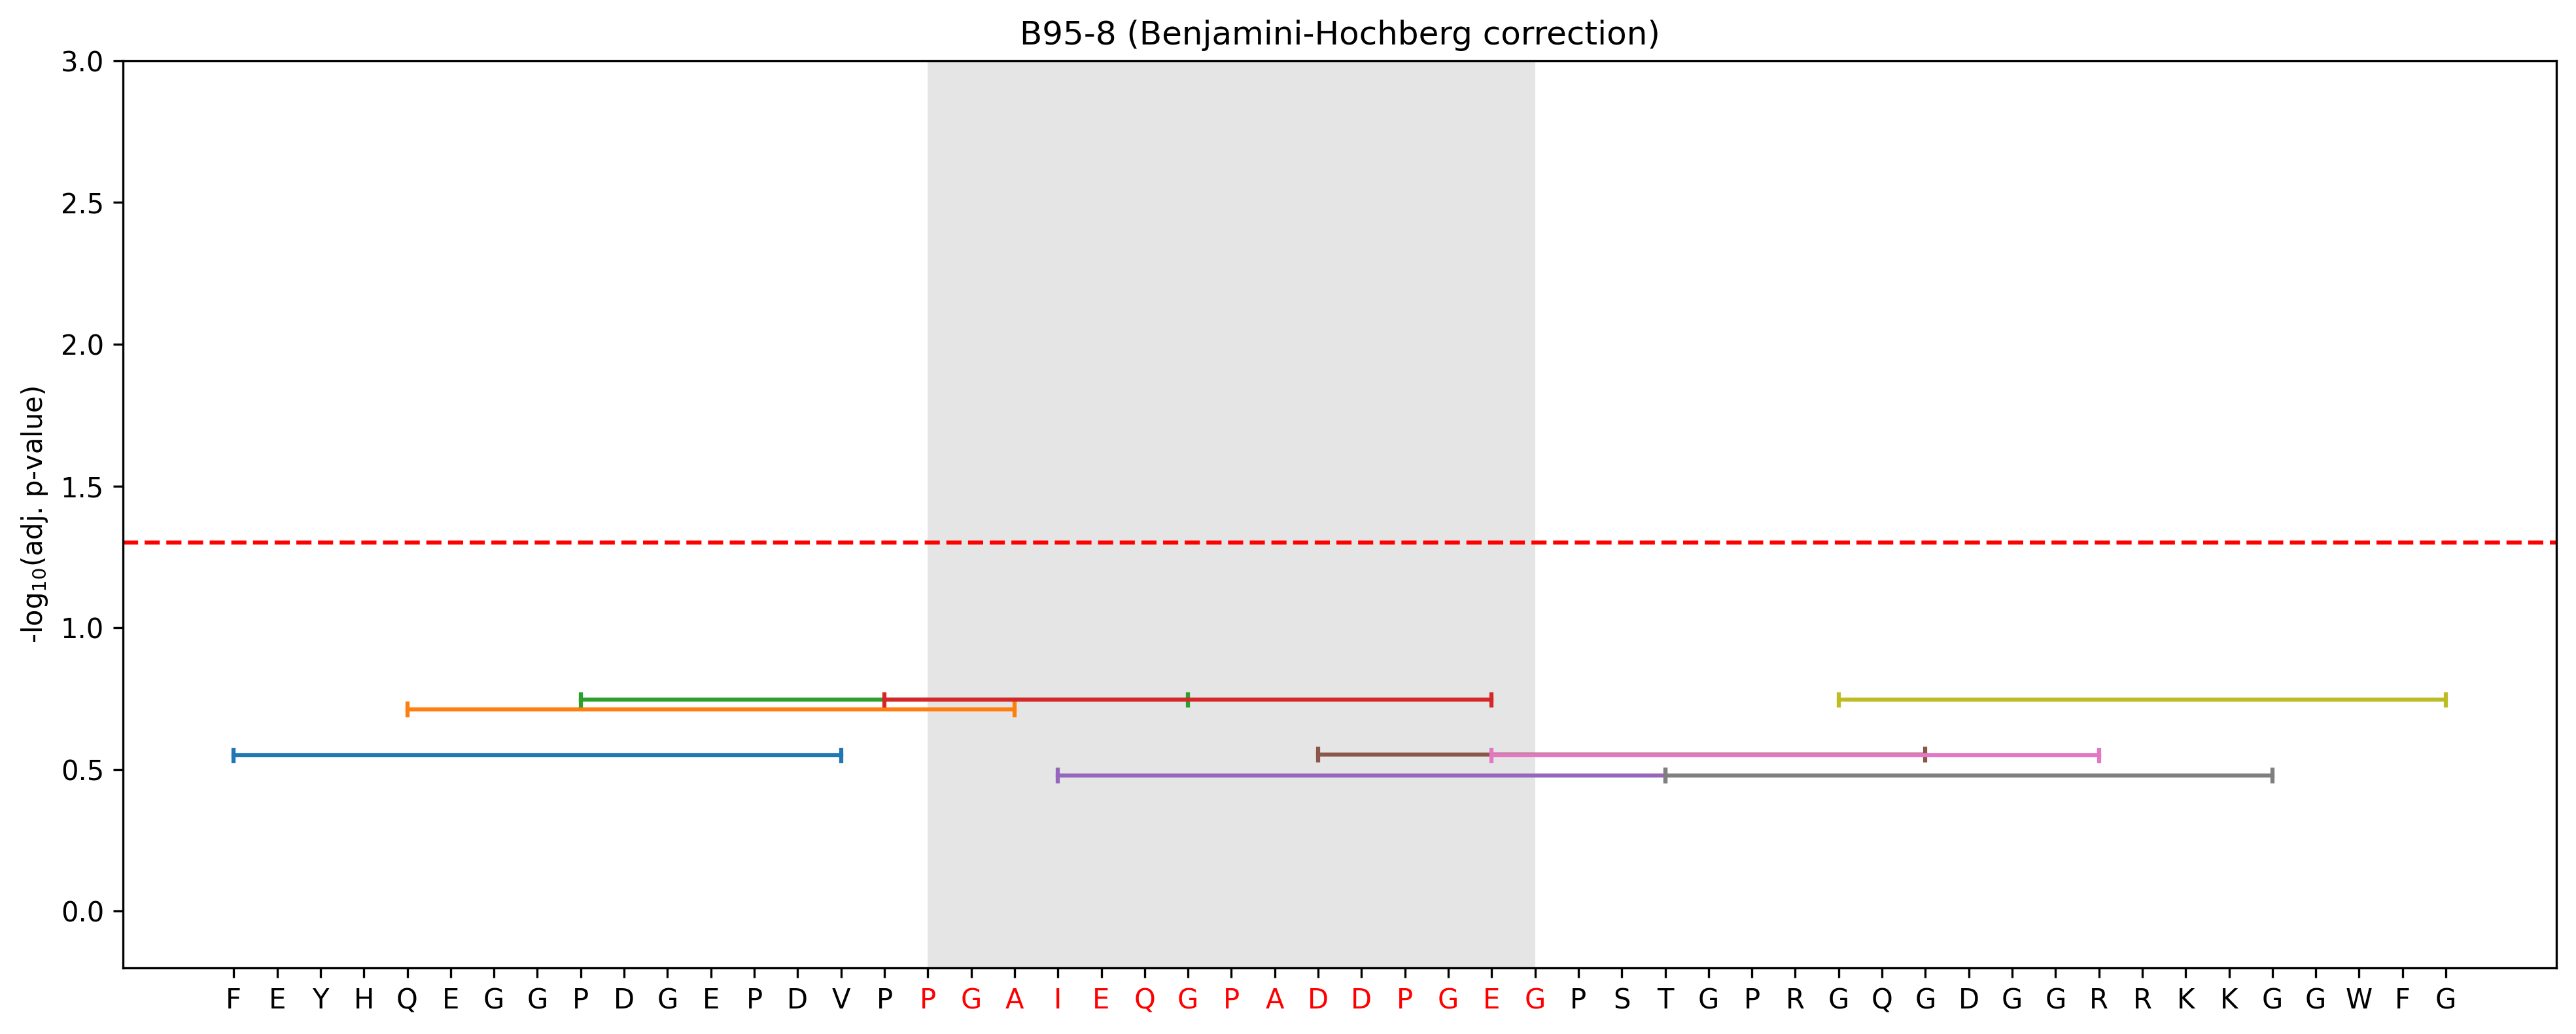

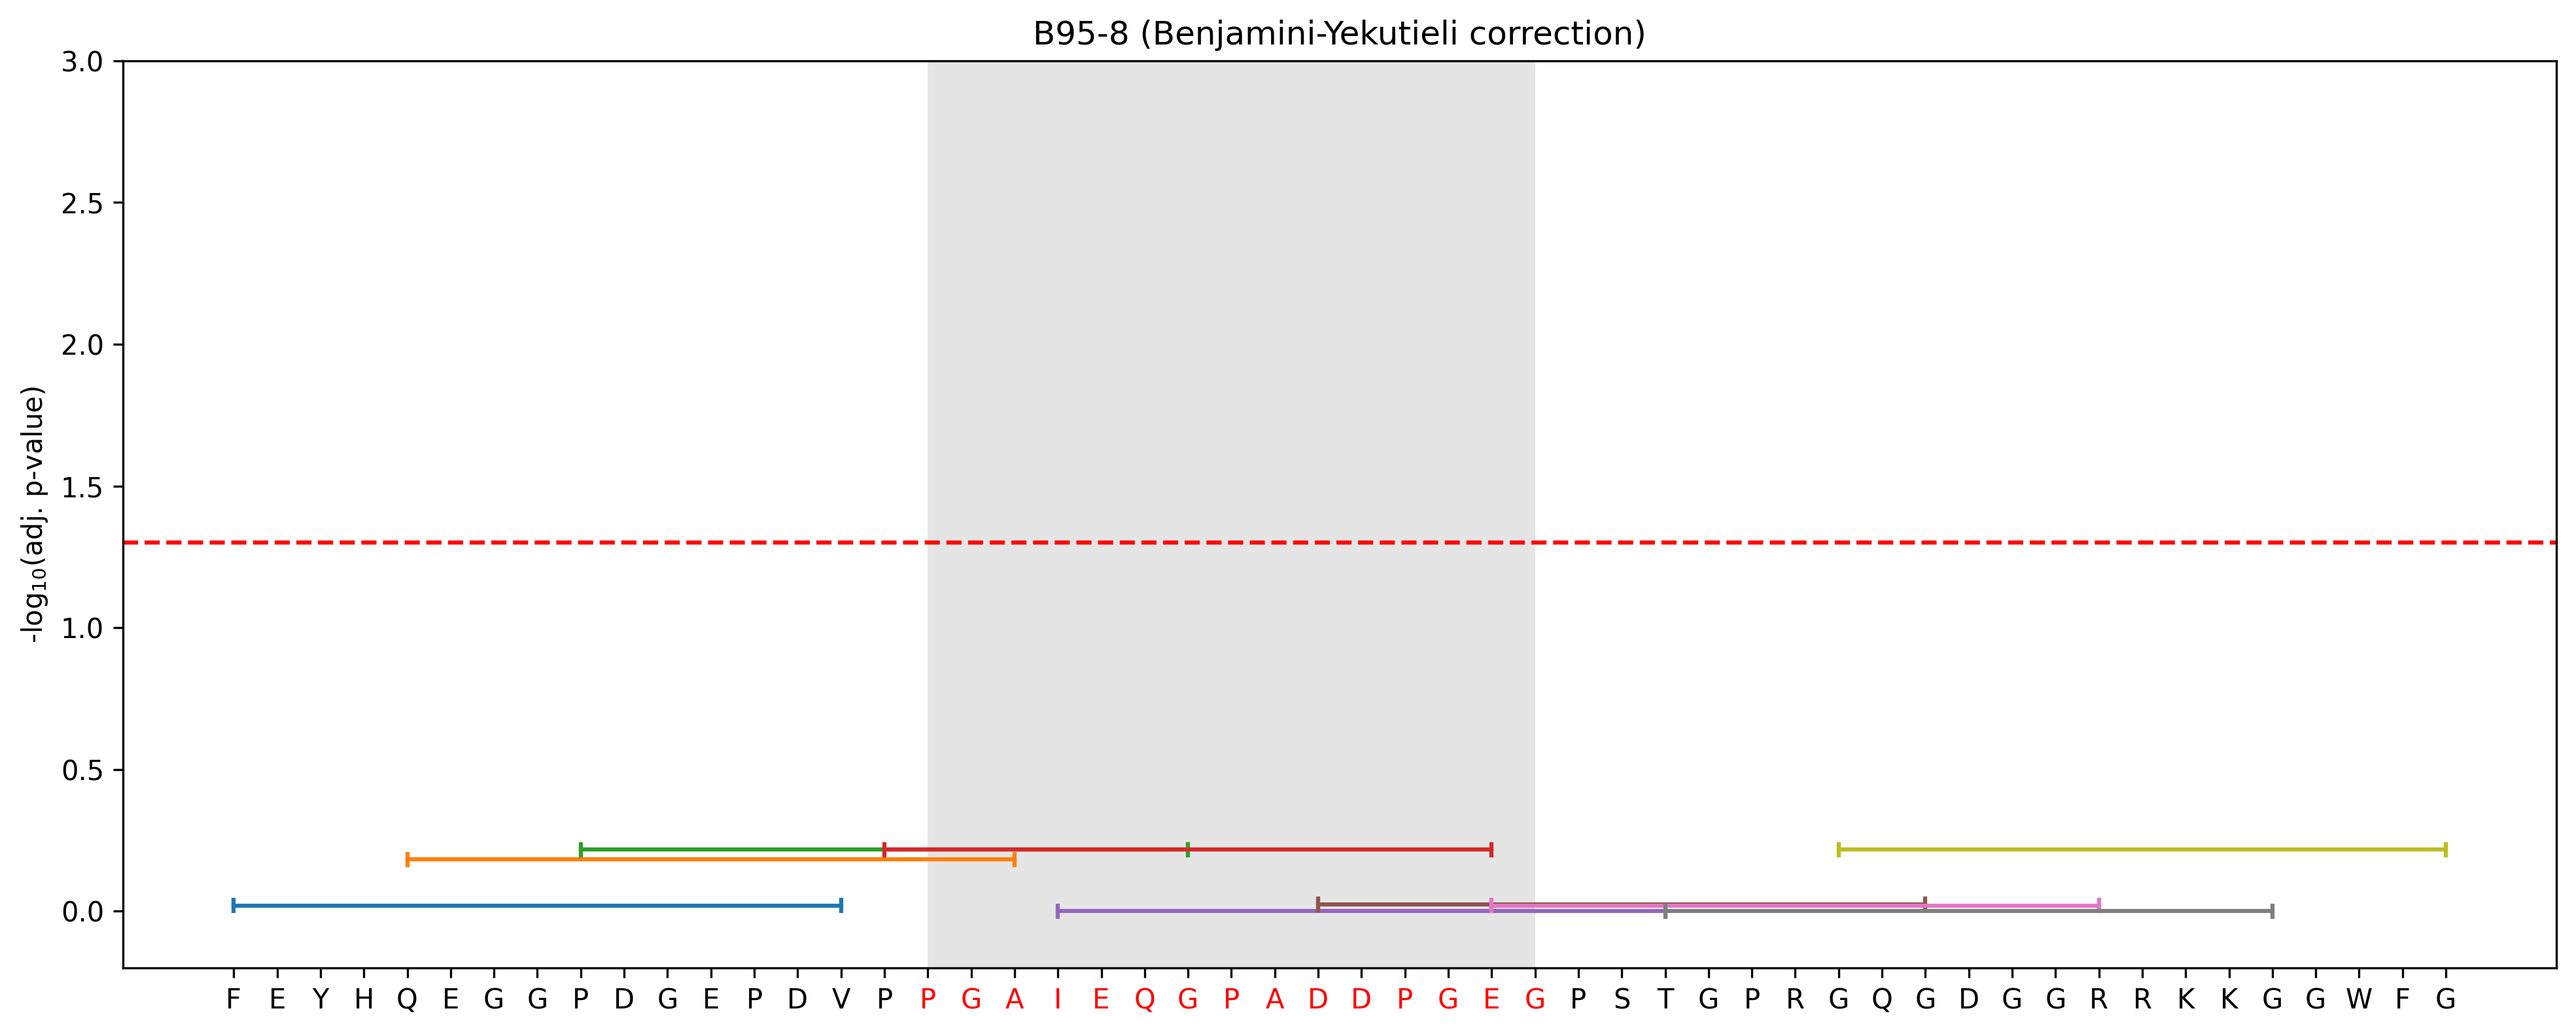

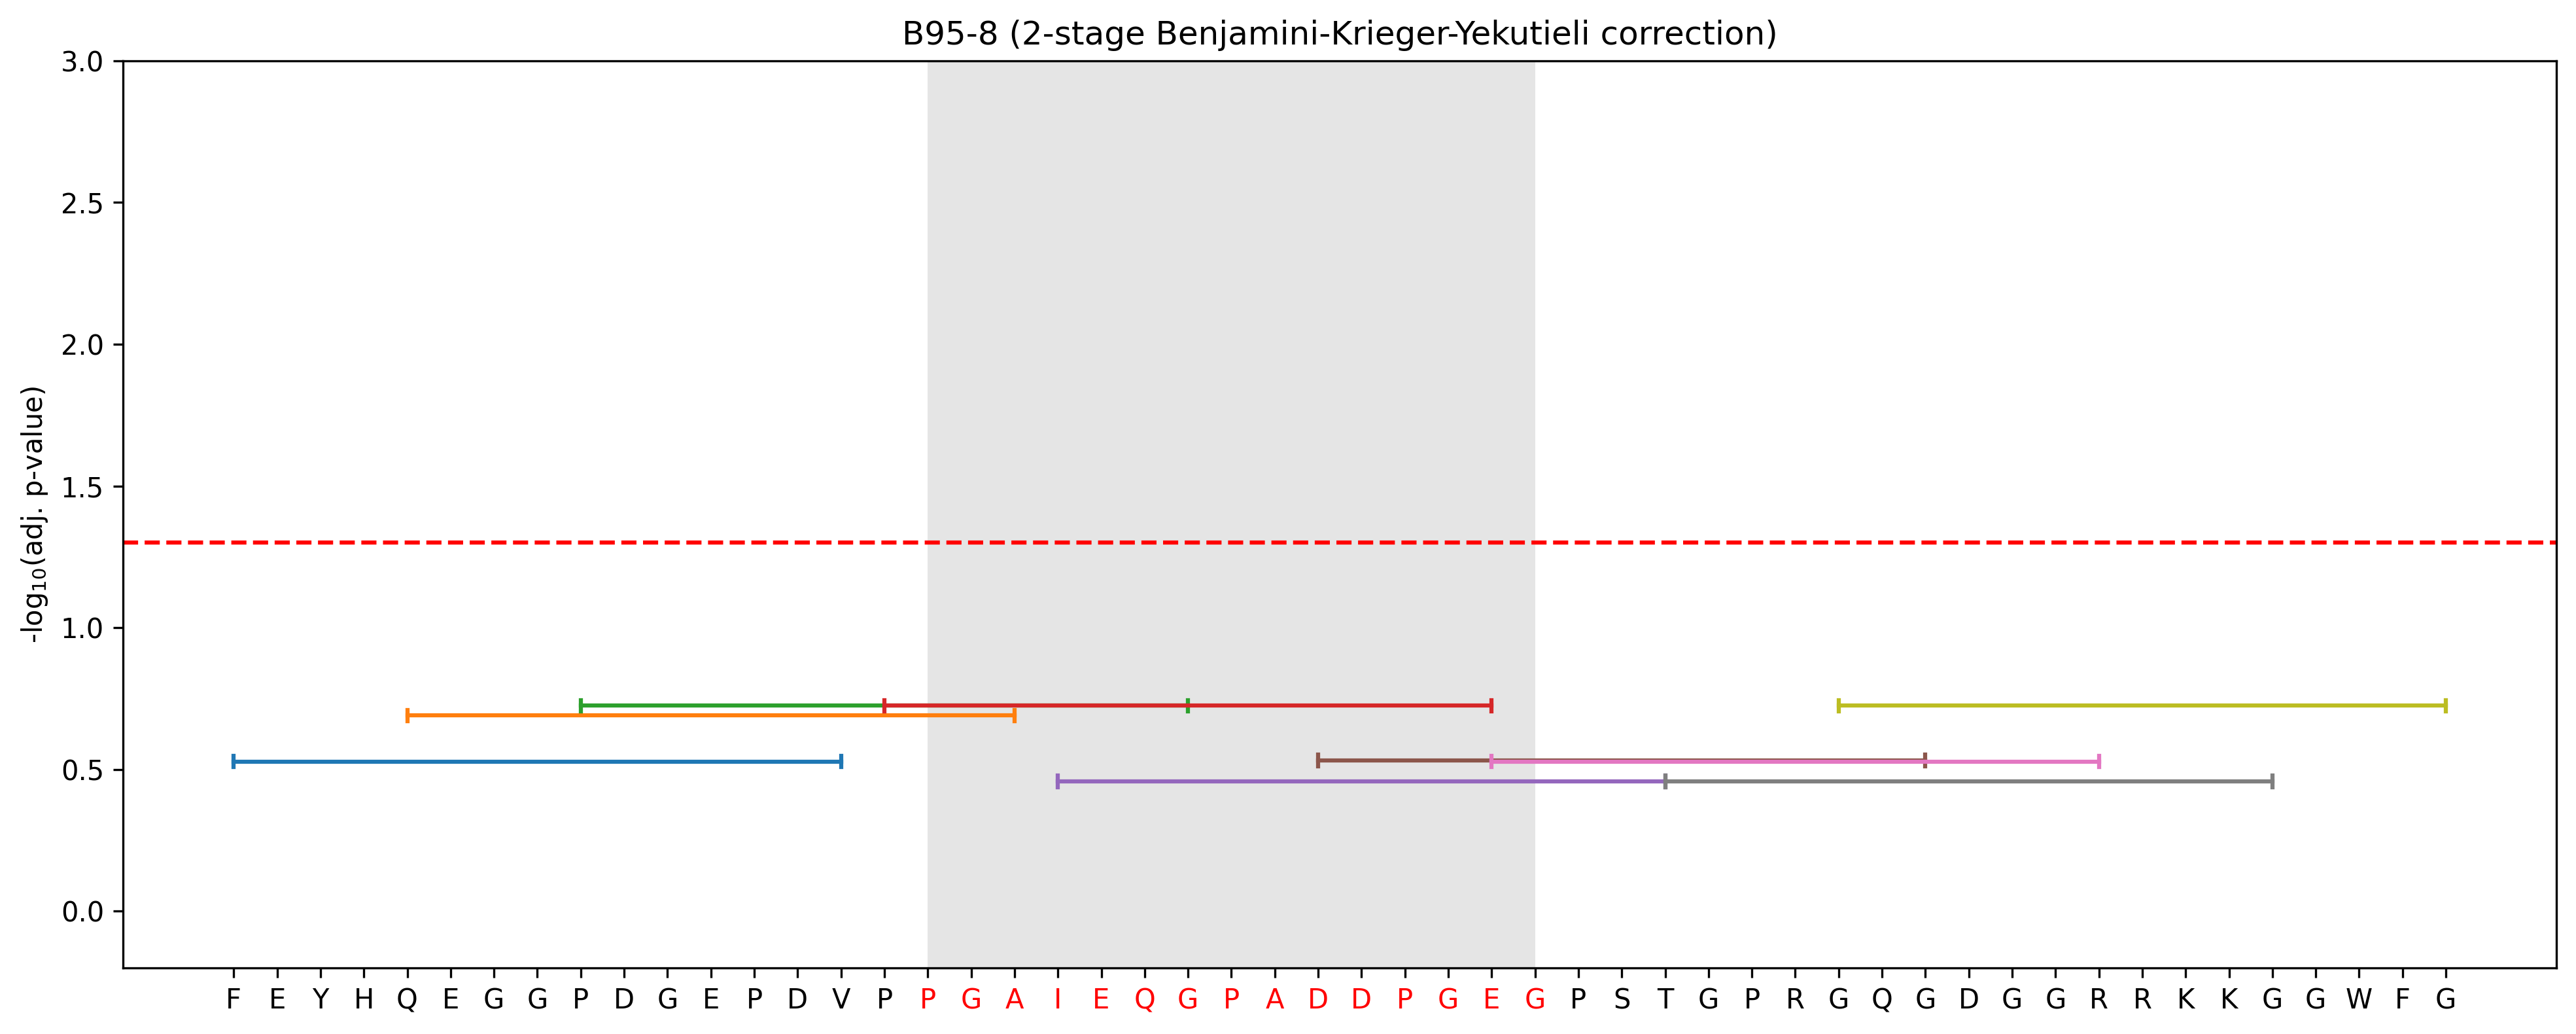

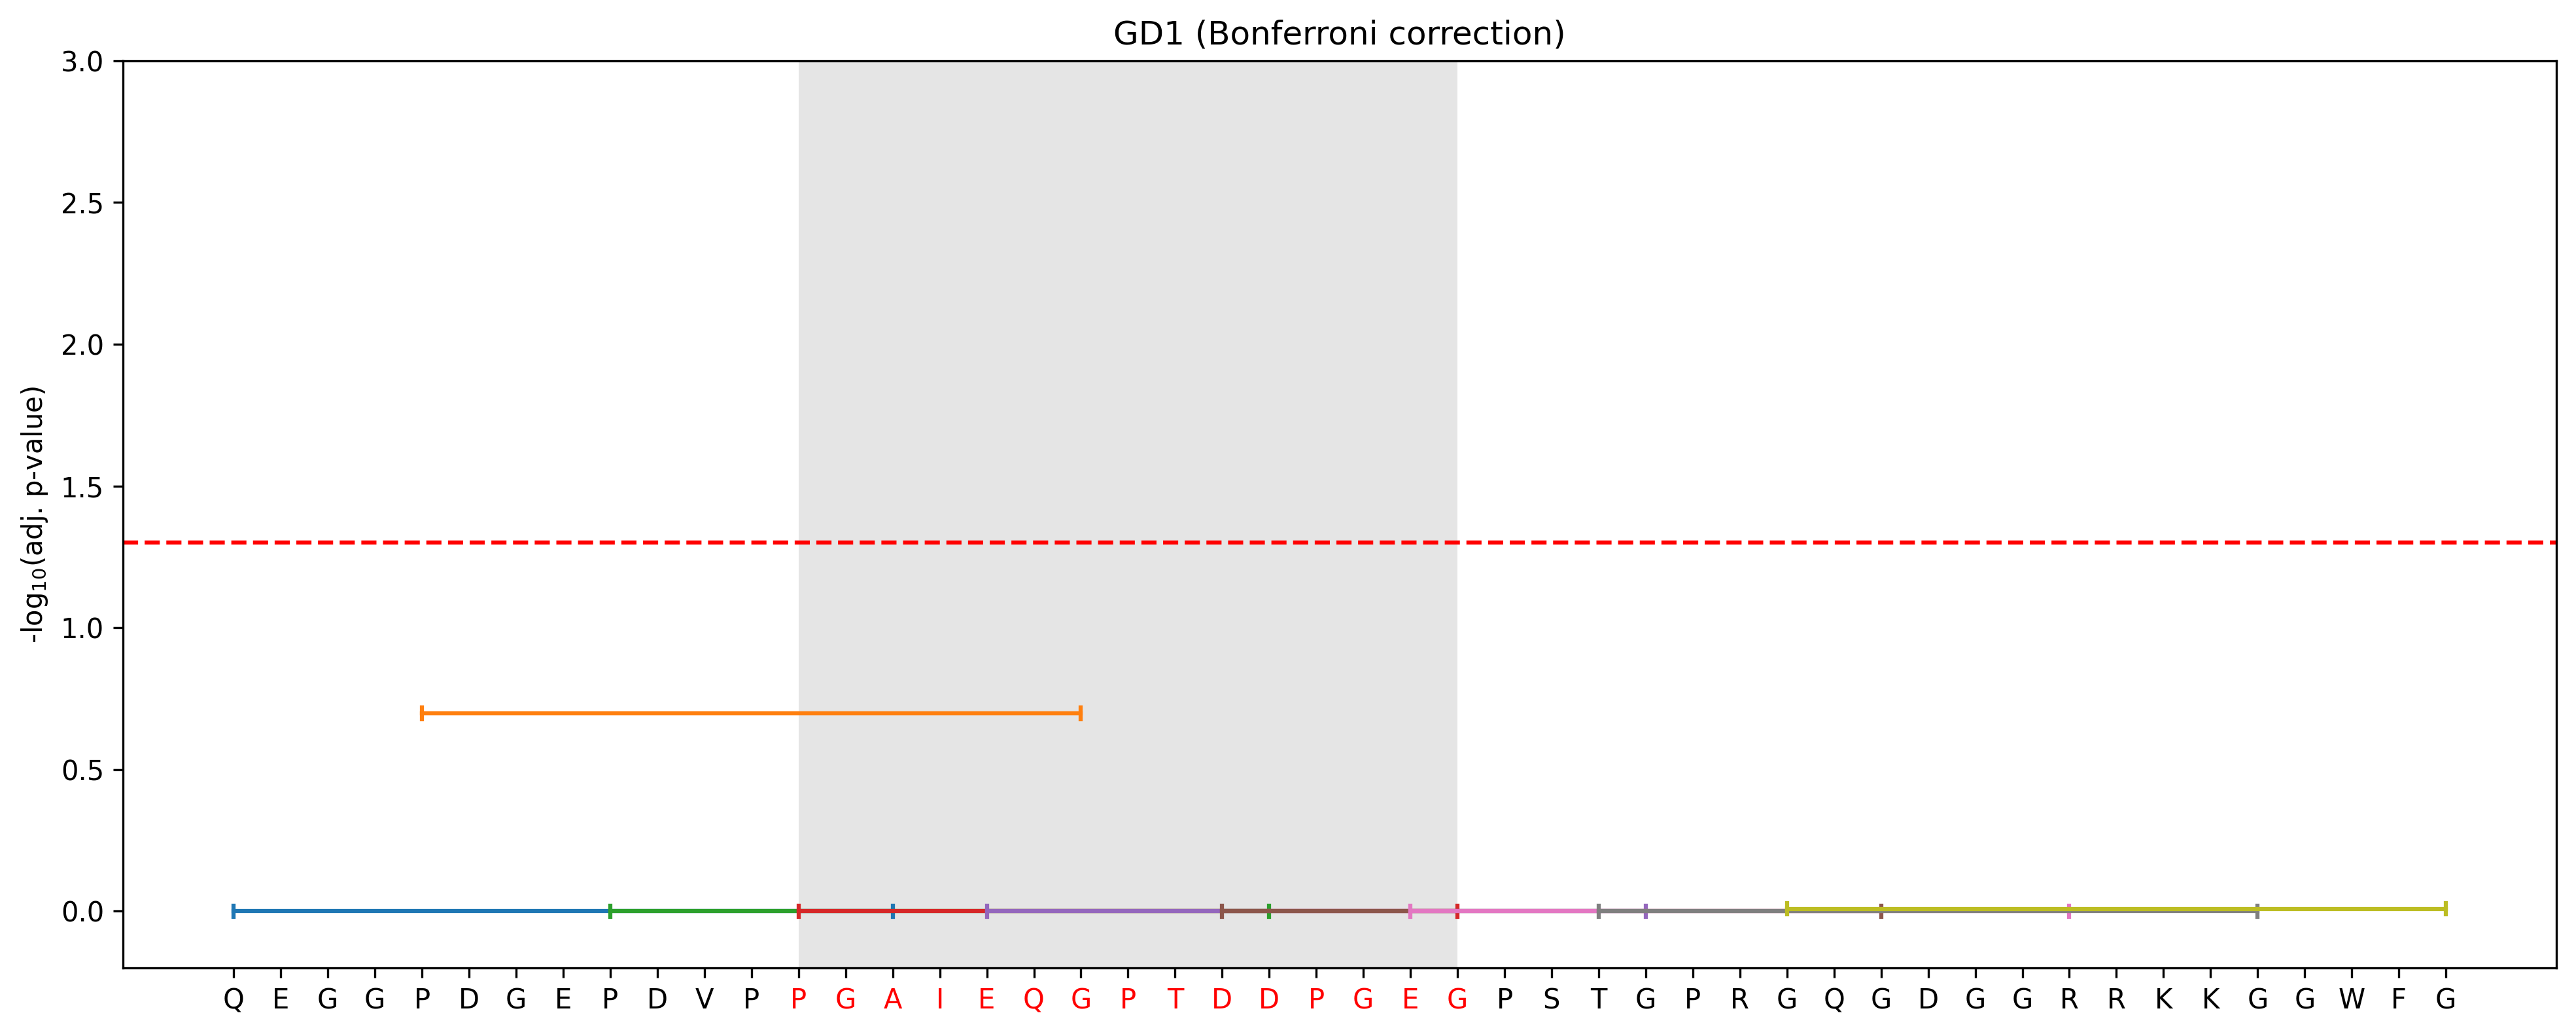

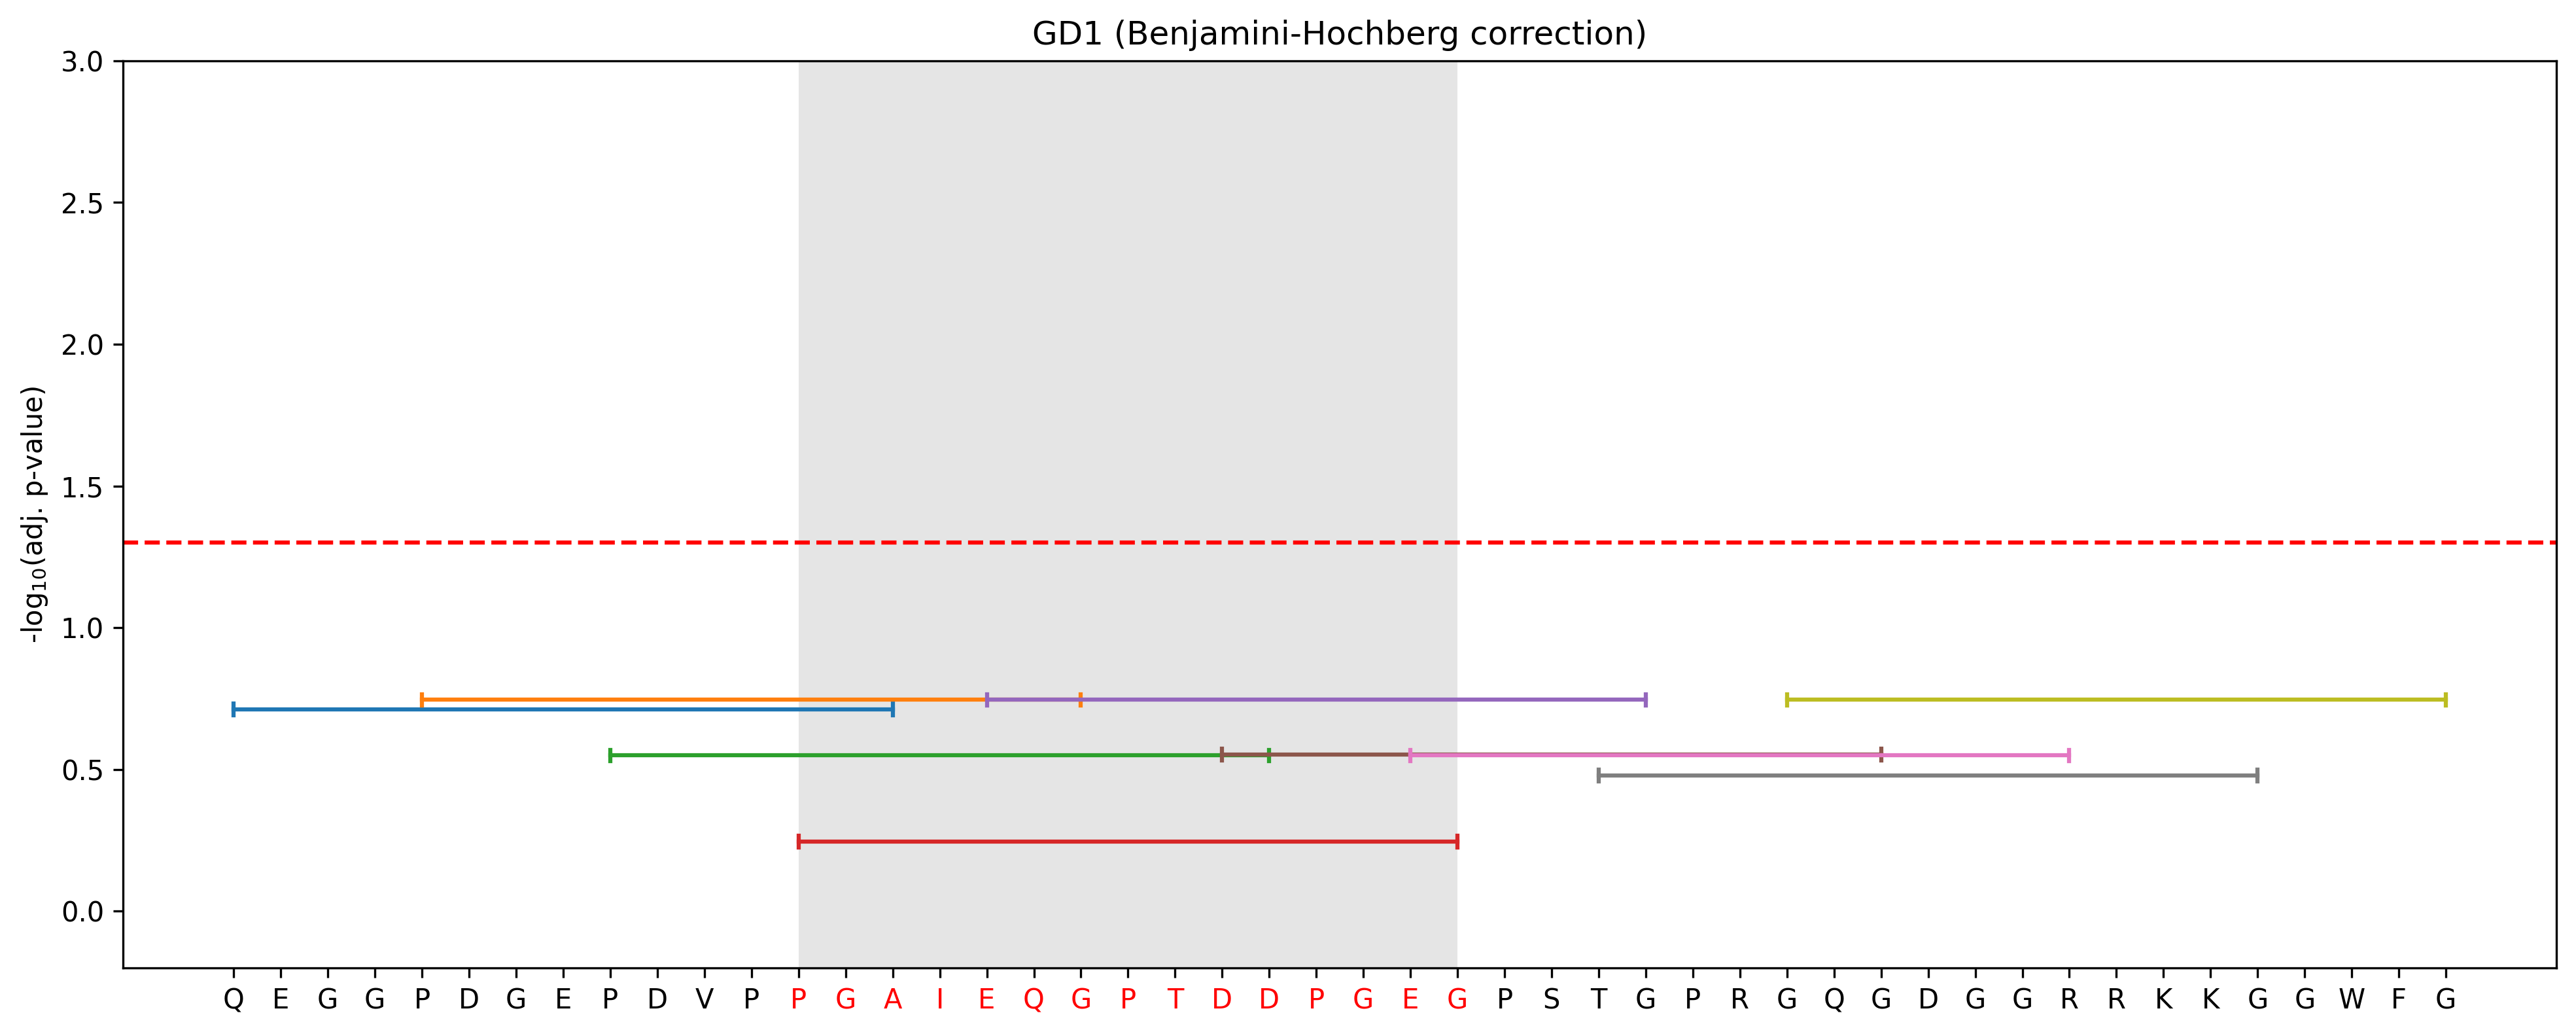

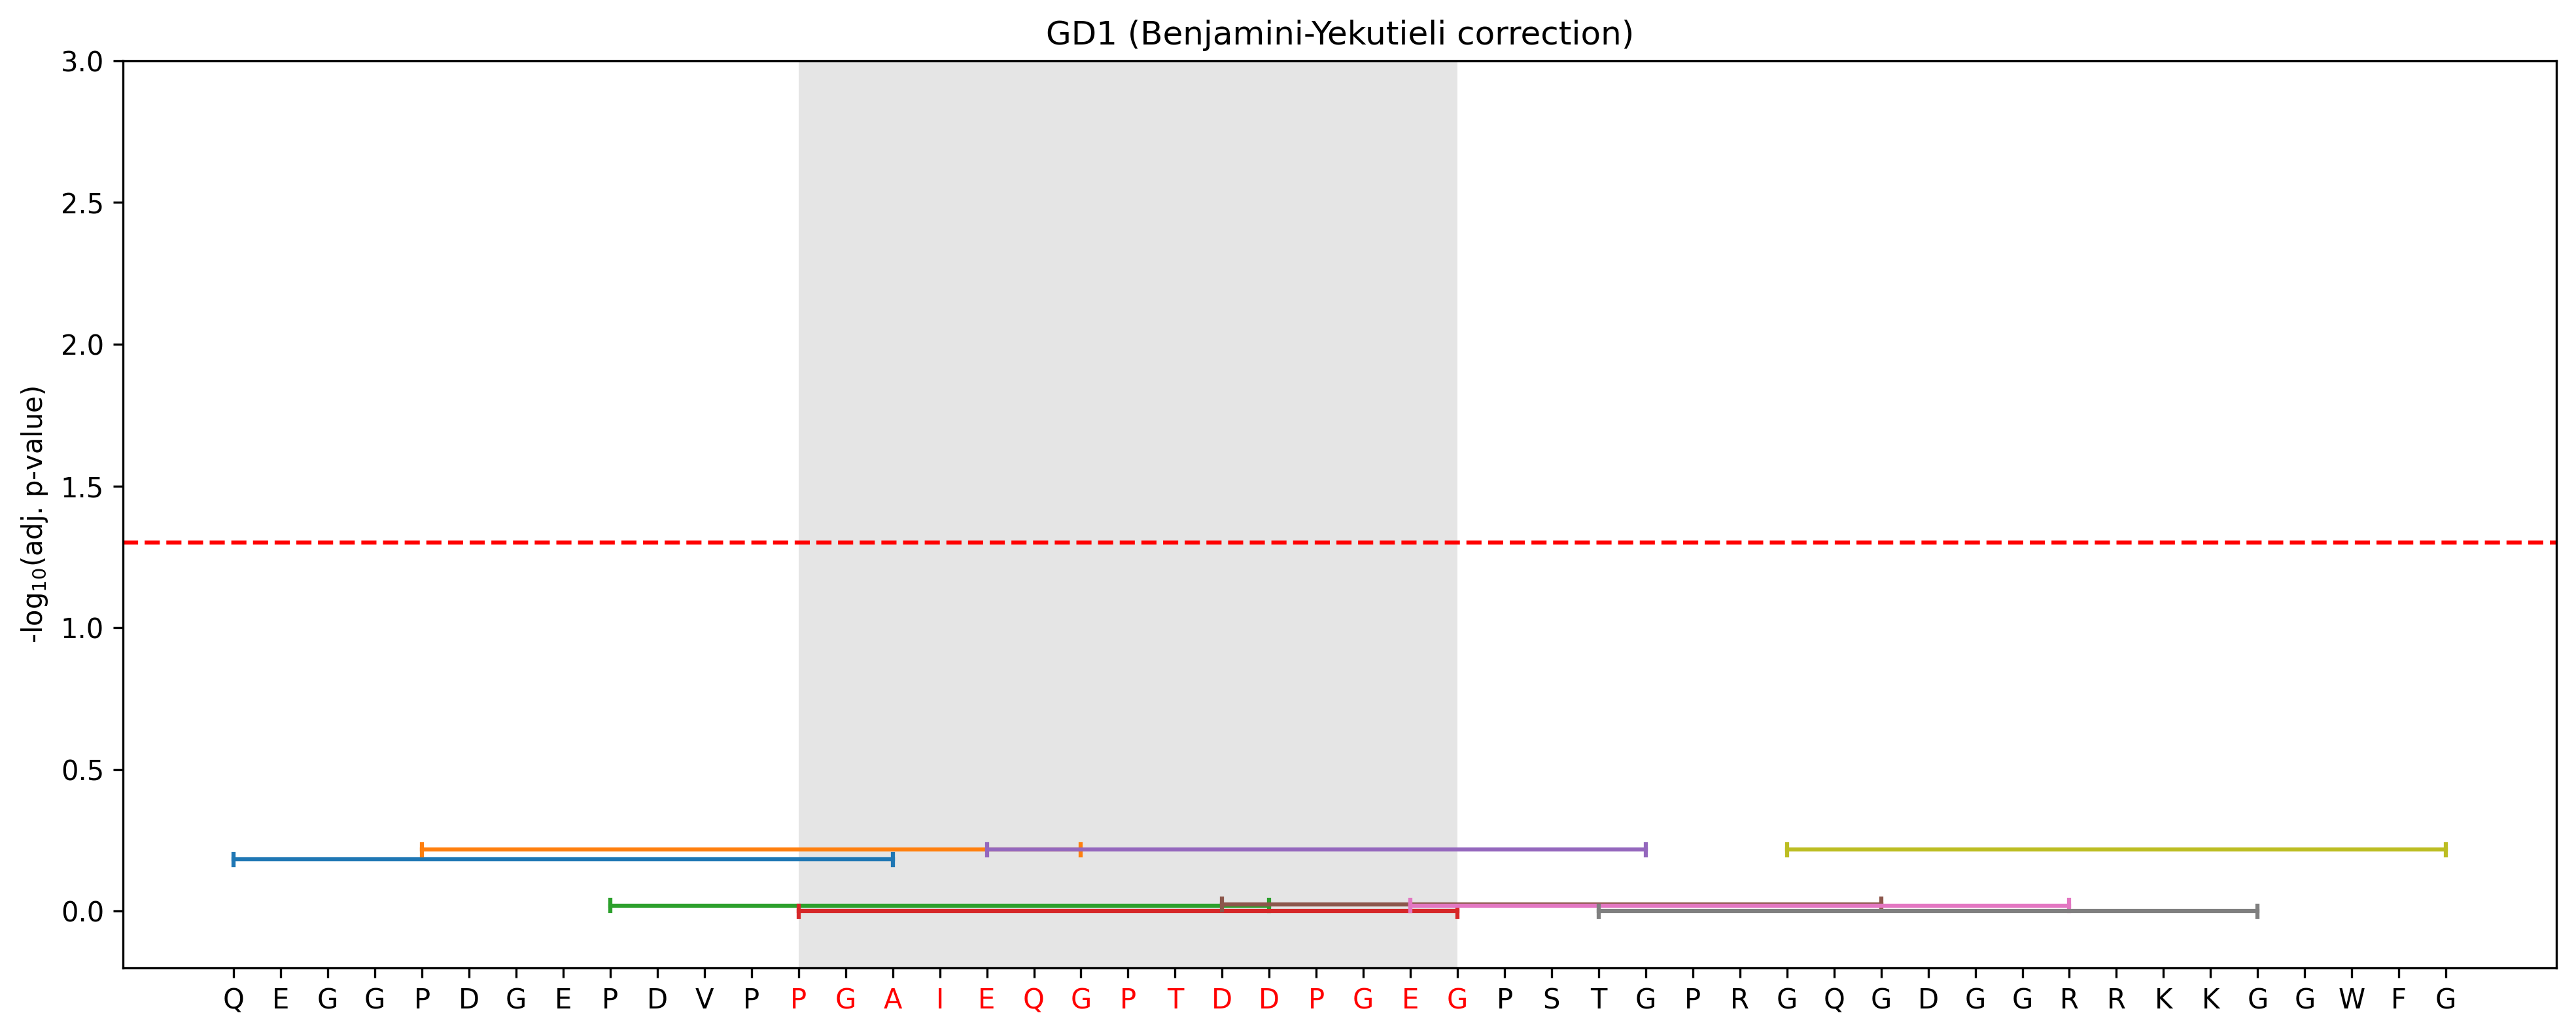

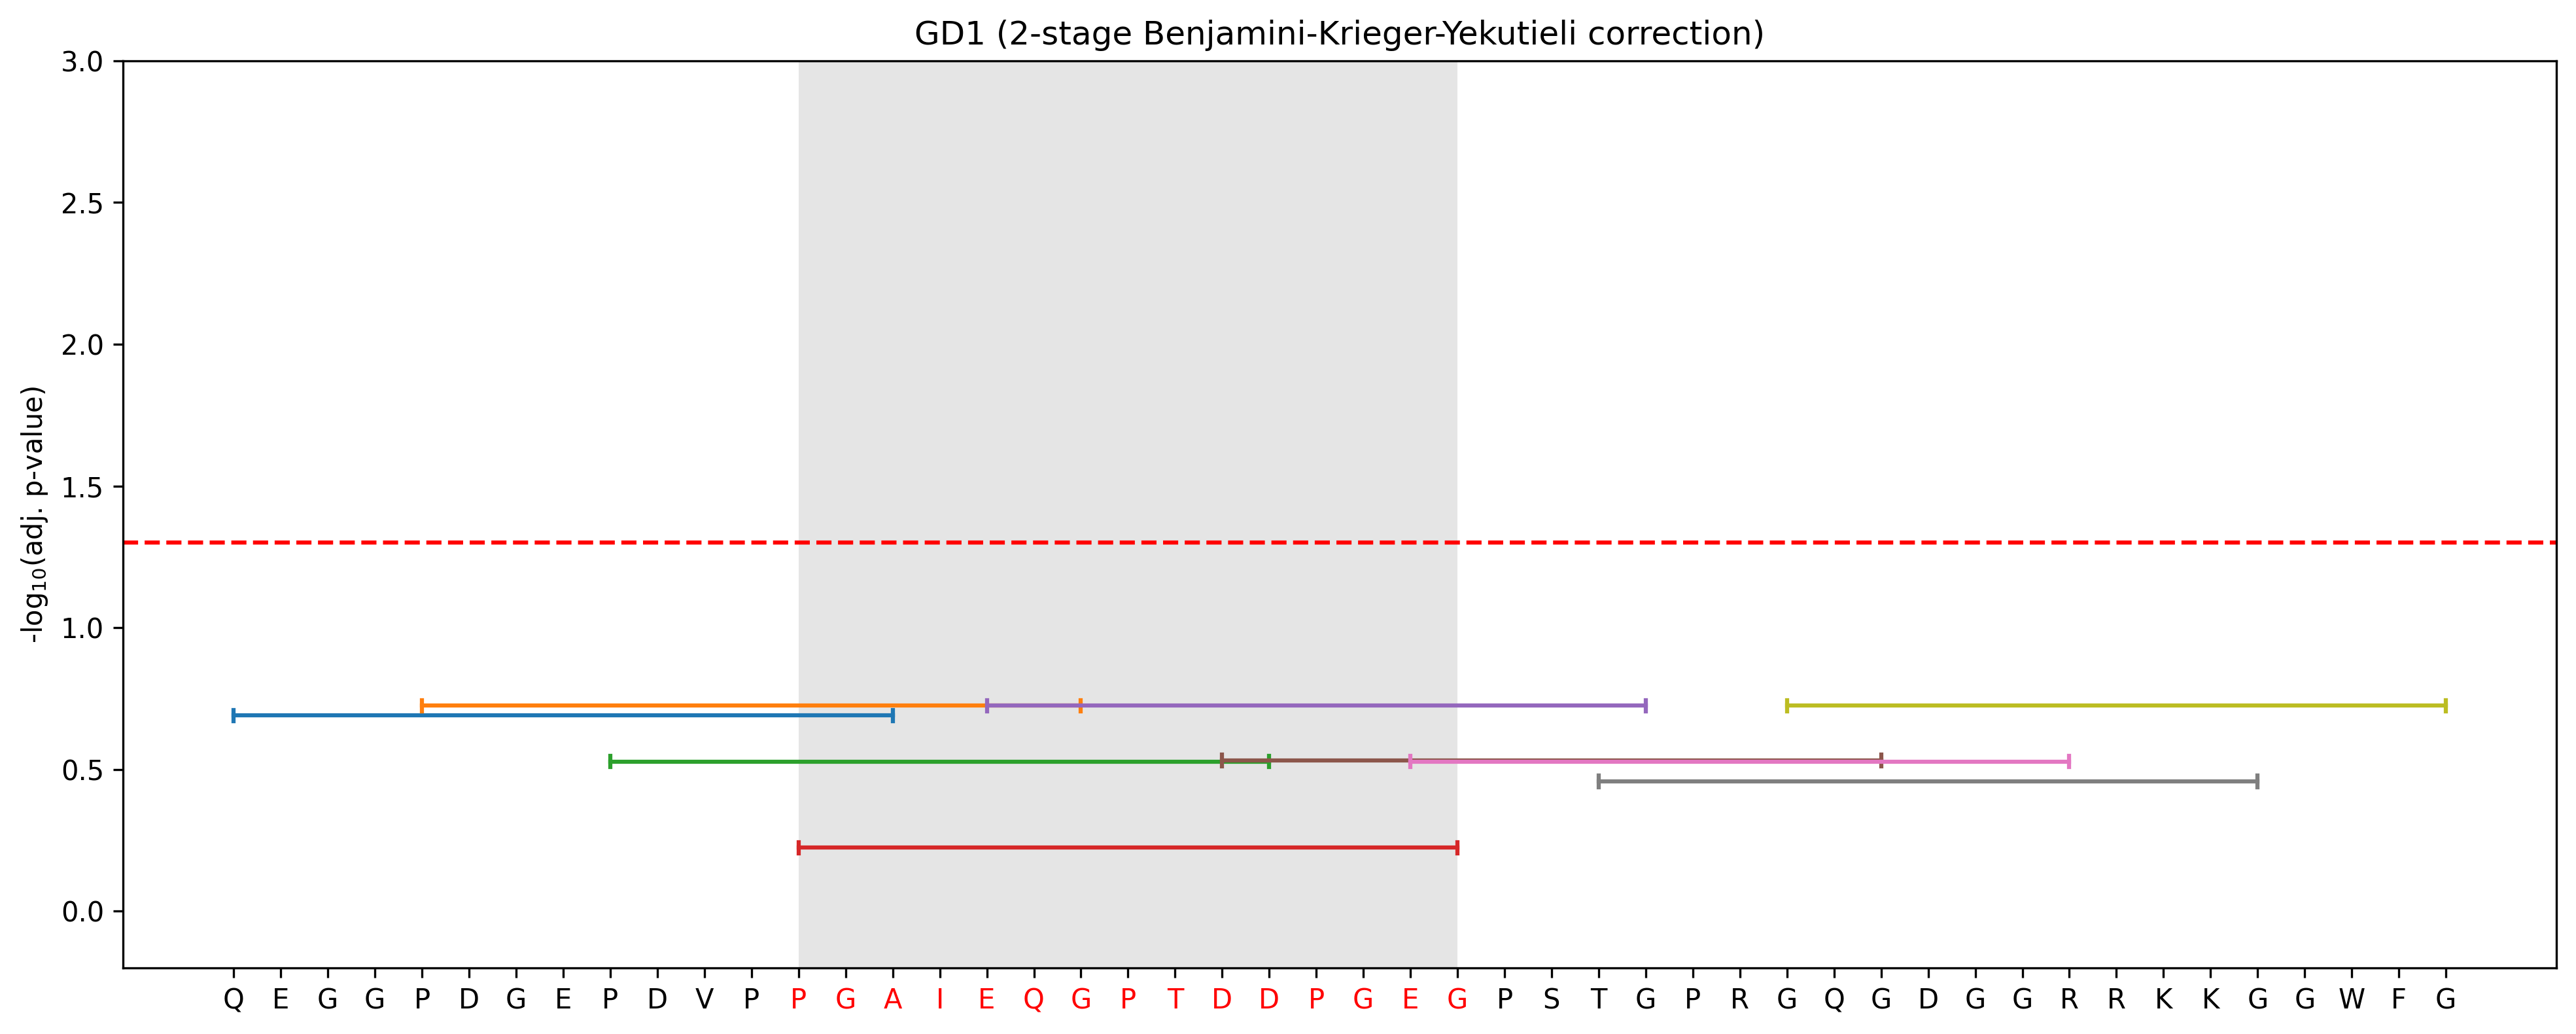

In [25]:
for j in range(len(strains)):
    for i in range(len(correction_types)):
        plot_correction(smr.groups, adj_p_values[i], correction_types[i], strains[j], strain_seqs[j], strain_stops[j], strain_targets[j])